In [1]:
import numpy as np
import pandas as pd
from scipy.stats import stats
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")


### Problem Statement 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### * EDA - Data Description , Data Preprocessing , Data Visualization.

#### Loading the Dataset CSV file of Problem Statement 1.

In [2]:
df=pd.read_csv("bank_marketing_Data.csv")

#### Checking the Records of the Dataset.

In [3]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


#### Data Dictionary for Problem Statment 1.



1.) spending: Amount spent by the customer per month (in 1000s)

2.) advance_payments: Amount paid by the customer in advance by cash (in 100s)

3.) probability_of_full_payment: Probability of payment done in full by the customer to the bank

4.) current_balance: Balance amount left in the account to make purchases (in 1000s)

5.) credit_limit: Limit of the amount in credit card (10000s)

6.) min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

7.) max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

#### Checking the Summary of the Dataset.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.

There is no bad values found in the dataset too.

#### Checking the Shape of the Dataframe.

In [5]:
df.shape

(210, 7)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The bank_marketing_Data.csv data set has 210 observations (rows) and 7 variables (columns) in the dataset.

#### Checking the  Appropriateness of Datatypes & Information of the Dataframe.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


From the above results we can see that there is no missing value present in the dataset.Their are total 210 rows & 7 columns in this dataset,indexed from 0 to 209. All Datatypes of variables are float64. Memory used by the dataset: 11.6 KB.


#### Checking for Null Values.

In [7]:
df.isnull().any()

spending                        False
advance_payments                False
probability_of_full_payment     False
current_balance                 False
credit_limit                    False
min_payment_amt                 False
max_spent_in_single_shopping    False
dtype: bool

No Null Values present in the dataset.

#### Checking for  Anomalies in the Dataset.

In [8]:
df["spending"].unique()

array([19.94, 15.99, 18.95, 10.83, 17.99, 12.7 , 12.02, 13.74, 18.17,
       11.23, 18.55, 14.09, 12.15, 18.98, 12.1 , 12.79, 16.14, 10.8 ,
       13.22, 12.37, 13.07, 17.98, 12.62, 15.11, 15.56, 12.78, 11.02,
       11.35, 13.78, 11.84, 12.55, 15.88, 11.82, 11.19, 11.14, 12.22,
       11.81, 19.51, 18.72, 13.84, 16.87, 20.03, 10.79, 11.18, 13.16,
       19.06, 18.96, 18.83, 12.73, 19.46, 19.38, 18.81, 16.23, 12.38,
       11.83, 10.93, 18.65, 14.79, 11.41, 11.27, 15.26, 14.34, 18.85,
       20.71, 14.11, 19.15, 12.19, 13.54, 12.49, 20.1 , 20.2 , 13.34,
       18.94, 15.03, 12.13, 16.82, 14.29, 14.52, 12.88, 13.94, 18.59,
       10.91, 14.49, 16.63, 15.38, 16.17, 13.2 , 13.99, 21.18, 11.87,
       18.43, 19.57, 16.16, 10.82, 17.63, 13.37, 19.31, 18.89, 15.69,
       18.36, 13.32, 12.8 , 18.75, 15.6 , 14.33, 20.24, 12.89, 11.21,
       17.32, 13.5 , 14.28, 11.48, 20.97, 12.08, 11.56, 12.46, 12.54,
       15.01, 18.3 , 11.4 , 14.46, 11.36, 14.86, 12.36, 12.05, 19.14,
       17.55, 14.59,

In [9]:
df["advance_payments"].unique()

array([16.92, 14.89, 16.42, 12.96, 15.86, 13.41, 13.33, 14.05, 16.26,
       12.88, 16.22, 14.41, 13.45, 16.57, 13.15, 13.53, 14.99, 12.57,
       13.84, 13.71, 13.47, 13.92, 15.85, 13.67, 14.54, 13.57, 13.  ,
       13.12, 12.82, 14.06, 13.21, 14.9 , 13.4 , 13.05, 12.79, 13.32,
       16.71, 16.34, 13.94, 15.65, 16.9 , 12.93, 12.72, 13.82, 16.45,
       16.2 , 16.29, 13.75, 16.19, 16.5 , 16.72, 15.18, 13.44, 13.23,
       12.8 , 16.41, 14.52, 12.95, 12.97, 14.85, 14.37, 16.17, 17.23,
       14.1 , 13.2 , 13.85, 13.46, 16.99, 16.89, 13.95, 16.32, 14.77,
       13.73, 15.51, 14.09, 14.6 , 13.5 , 14.17, 16.05, 14.61, 15.46,
       15.38, 13.66, 13.83, 17.21, 14.84, 13.04, 13.02, 15.97, 16.74,
       15.33, 12.83, 13.78, 16.59, 14.66, 16.23, 14.75, 16.49, 16.52,
       16.18, 15.11, 14.28, 16.91, 13.77, 13.13, 15.91, 17.25, 13.31,
       14.26, 14.76, 15.89, 13.08, 14.18, 14.35, 14.67, 13.19, 16.66,
       15.98, 16.61, 12.86, 15.66, 14.91, 14.43, 12.87, 13.36, 16.31,
       12.73, 14.04,

In [10]:
df["probability_of_full_payment"].unique()

array([0.8752, 0.9064, 0.8829, 0.8099, 0.8992, 0.8874, 0.8503, 0.8744,
       0.8637, 0.8511, 0.8865, 0.8529, 0.8443, 0.8687, 0.8793, 0.8786,
       0.9034, 0.859 , 0.868 , 0.8491, 0.8567, 0.848 , 0.8993, 0.8481,
       0.8986, 0.8823, 0.8716, 0.8189, 0.8291, 0.8594, 0.8759, 0.8521,
       0.8558, 0.8988, 0.8274, 0.8253, 0.8652, 0.8198, 0.878 , 0.881 ,
       0.8955, 0.8648, 0.8811, 0.8107, 0.8662, 0.8854, 0.9077, 0.8917,
       0.8458, 0.8977, 0.8985, 0.8906, 0.885 , 0.8609, 0.8496, 0.839 ,
       0.8698, 0.8819, 0.856 , 0.8419, 0.8696, 0.8726, 0.9056, 0.8763,
       0.8911, 0.889 , 0.8783, 0.8871, 0.8658, 0.8746, 0.8894, 0.862 ,
       0.8942, 0.8081, 0.905 , 0.8557, 0.8879, 0.8728, 0.9066, 0.8372,
       0.8538, 0.8747, 0.8706, 0.8588, 0.8883, 0.9183, 0.8989, 0.871 ,
       0.8266, 0.8795, 0.8779, 0.8644, 0.8256, 0.88  , 0.8849, 0.8815,
       0.899 , 0.9008, 0.9058, 0.875 , 0.8452, 0.8613, 0.886 , 0.8999,
       0.858 , 0.8831, 0.8897, 0.8541, 0.8167, 0.8599, 0.8852, 0.8944,
      

In [11]:
df["current_balance"].unique()

array([6.675, 5.363, 6.248, 5.278, 5.89 , 5.183, 5.35 , 5.482, 6.271,
       5.14 , 6.153, 5.717, 5.417, 6.449, 5.105, 5.224, 5.658, 4.981,
       5.395, 5.386, 5.204, 5.472, 5.979, 5.41 , 5.579, 5.776, 5.262,
       5.325, 5.176, 5.089, 5.479, 5.175, 5.333, 5.618, 5.314, 5.25 ,
       5.011, 5.413, 6.366, 6.219, 5.324, 6.139, 6.493, 5.317, 5.009,
       5.454, 6.416, 6.051, 6.037, 5.412, 6.006, 6.113, 6.303, 6.272,
       5.872, 5.219, 5.263, 5.046, 6.285, 5.545, 5.09 , 5.088, 5.714,
       5.63 , 6.152, 6.579, 5.42 , 6.245, 5.137, 5.348, 5.267, 6.581,
       5.389, 6.144, 5.702, 5.394, 6.017, 5.291, 5.741, 5.139, 5.585,
       5.715, 6.053, 5.884, 5.762, 5.236, 5.119, 6.573, 5.763, 5.22 ,
       5.132, 5.98 , 6.384, 5.845, 5.18 , 6.033, 5.32 , 6.341, 5.477,
       6.227, 5.527, 6.445, 6.666, 5.541, 5.16 , 6.111, 5.832, 5.504,
       6.315, 5.495, 5.279, 6.064, 5.351, 5.397, 6.563, 5.099, 5.451,
       5.52 , 5.789, 5.136, 5.388, 5.678, 5.076, 6.549, 6.191, 6.259,
       5.091, 5.791,

In [12]:
df["credit_limit"].unique()

array([3.763, 3.582, 3.755, 2.641, 3.694, 3.091, 2.81 , 3.114, 3.512,
       2.795, 3.674, 3.186, 2.837, 3.552, 2.941, 3.054, 3.562, 2.821,
       3.07 , 2.911, 2.96 , 2.994, 3.687, 3.462, 3.408, 3.026, 2.701,
       2.668, 3.156, 2.836, 2.968, 3.507, 2.777, 2.675, 2.794, 2.967,
       2.716, 3.801, 3.684, 3.379, 3.463, 3.857, 2.648, 2.975, 3.719,
       3.897, 3.786, 2.882, 3.892, 3.791, 3.693, 3.472, 2.989, 2.84 ,
       2.717, 3.594, 3.291, 2.775, 2.763, 3.242, 3.19 , 3.806, 3.814,
       3.302, 3.815, 2.981, 3.785, 3.864, 3.074, 3.825, 3.212, 2.745,
       3.486, 3.337, 3.113, 3.119, 3.15 , 3.86 , 3.465, 3.268, 3.387,
       3.232, 3.383, 4.033, 3.312, 2.693, 2.953, 3.771, 3.772, 3.395,
       2.63 , 3.573, 3.128, 3.81 , 3.769, 3.514, 3.639, 3.485, 3.073,
       3.126, 3.869, 3.286, 3.199, 3.962, 2.687, 3.403, 3.158, 3.298,
       2.758, 3.991, 2.936, 2.683, 3.017, 2.879, 3.168, 3.245, 3.221,
       3.377, 2.755, 3.258, 3.042, 3.67 , 2.847, 3.561, 3.737, 2.804,
       3.69 , 3.333,

In [13]:
df["min_payment_amt"].unique()

array([3.252 , 3.336 , 3.368 , 5.182 , 2.068 , 8.456 , 4.271 , 2.932 ,
       2.853 , 4.325 , 1.738 , 3.92  , 3.638 , 2.144 , 2.201 , 5.483 ,
       1.355 , 4.773 , 4.157 , 3.26  , 3.919 , 5.304 , 2.257 , 3.306 ,
       3.128 , 4.972 , 1.176 , 6.735 , 4.337 , 7.524 , 3.136 , 3.598 ,
       4.419 , 0.7651, 4.471 , 5.813 , 6.388 , 5.469 , 4.898 , 2.962 ,
       2.188 , 2.259 , 3.696 , 3.063 , 5.462 , 4.051 , 0.8551, 2.248 ,
       4.334 , 2.553 , 3.533 , 5.324 , 4.308 , 3.678 , 3.237 , 3.769 ,
       5.472 , 5.195 , 5.398 , 4.391 , 2.704 , 4.957 , 4.309 , 4.543 ,
       1.313 , 2.843 , 4.451 , 2.7   , 3.084 , 3.631 , 2.587 , 4.421 ,
       1.955 , 5.173 , 5.995 , 2.908 , 1.933 , 4.825 , 4.004 , 2.699 ,
       1.481 , 2.352 , 2.124 , 6.001 , 4.179 , 4.116 , 2.04  , 4.462 ,
       4.286 , 8.315 , 5.234 , 5.78  , 2.221 , 3.332 , 3.597 , 2.984 ,
       1.472 , 4.266 , 4.853 , 3.747 , 4.67  , 3.477 , 3.6   , 3.639 ,
       1.599 , 5.064 , 4.933 , 7.035 , 4.873 , 4.188 , 2.725 , 3.328 ,
      

In [14]:
df["max_spent_in_single_shopping"].unique()

array([6.55 , 5.144, 6.148, 5.185, 5.837, 5.   , 5.308, 4.825, 6.273,
       5.003, 5.894, 5.299, 5.338, 6.453, 5.056, 4.958, 5.175, 5.063,
       5.088, 5.316, 5.001, 5.395, 5.919, 5.231, 5.18 , 5.847, 4.782,
       5.163, 5.132, 4.957, 4.872, 5.044, 5.176, 5.091, 5.178, 5.219,
       5.049, 5.221, 5.352, 6.185, 6.097, 4.805, 5.967, 6.32 , 5.194,
       4.828, 6.163, 5.75 , 5.879, 5.067, 6.009, 5.965, 6.053, 5.922,
       5.045, 5.307, 6.102, 5.111, 5.314, 5.15 , 6.2  , 6.451, 4.87 ,
       5.002, 6.449, 6.187, 5.949, 5.439, 5.22 , 5.841, 5.487, 4.607,
       5.012, 5.877, 4.956, 5.396, 5.795, 5.703, 4.781, 6.231, 5.905,
       5.089, 5.929, 6.238, 5.966, 5.046, 6.362, 6.448, 5.44 , 4.914,
       5.992, 5.752, 5.224, 6.188, 5.275, 6.316, 4.961, 5.182, 5.147,
       5.491, 5.962, 5.038, 5.263, 5.351, 4.605, 6.498, 6.06 , 5.661,
       5.136, 4.869, 5.158, 5.924, 4.963, 5.27 , 5.527, 4.649, 5.092,
       5.222, 5.971, 6.321, 6.109, 5.791, 6.197, 5.135, 5.528, 5.36 ,
       4.83 , 5.31 ,

No Anomalies found in the Dataset.

#### Checking for Duplicate Rows. 

In [15]:
dups= df.duplicated()
print("Number of Duplicated Row in the Dataset = %d" %(dups.sum()))

Number of Duplicated Row in the Dataset = 0


#### Univariate Analysis 

#### *Histogram & Boxplot

* A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.

* A boxplot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.



<AxesSubplot:xlabel='spending'>

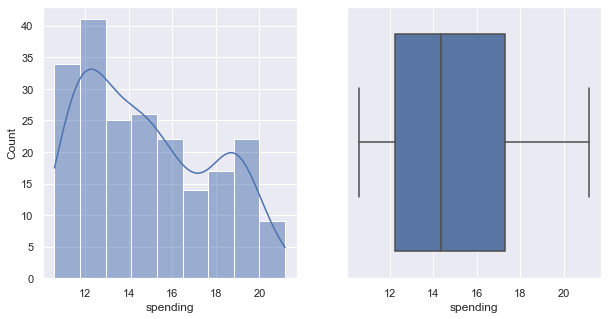

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['spending'], kde=True, ax=axes[0])
sns.boxplot(x='spending', data=df, ax=axes[1])


In [17]:
df["spending"].describe().T

count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64

In [18]:
stats.skew(df.spending)

0.39702715402072153

#### Insight

* spending:amount spent by the customer per month (in 1000s) ranges from a minimum of 10.59 to maximum of  21.18.

* The average spending:amount spent by the customer per month (in 1000s) is around 14.84.

* The standard deviation of the spending:amount spent by the customer per month (in 1000s) is 2.909.

* 25% , 50% (median) and 75 % of the spending:amount spent by the customer per month (in 1000s) are 12.27 , 14.35 and 17.30.

* Skewness indicating that the ditribution is slightly right skewed.

<AxesSubplot:xlabel='advance_payments'>

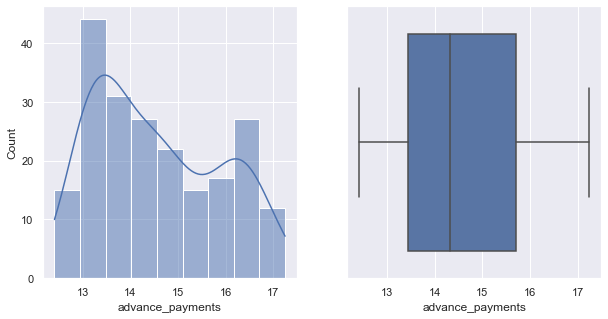

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['advance_payments'], kde=True, ax=axes[0])
sns.boxplot(x='advance_payments', data=df, ax=axes[1])

In [20]:
df["advance_payments"].describe().T

count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64

In [21]:
stats.skew(df.advance_payments)

0.38380604212562563

#### Insights

* advance_payments:amount paid by the customer in advance by cash (in 100s) ranges from a minimum of 12.41 to maximum of  17.25.

* The average advance_payments:amount paid by the customer in advance by cash (in 100s) is around 14.55.

* The standard deviation of the advance_payments:amount paid by the customer in advance by cash (in 100s) is 1.305.

* 25% , 50% (median) and 75 % of the advance_payments:amount paid by the customer in advance by cash (in 100s) are  13.45, 14.32 ,  and 15.71.

* Skewness indicating that the ditribution is slightly right skewed..

<AxesSubplot:xlabel='probability_of_full_payment'>

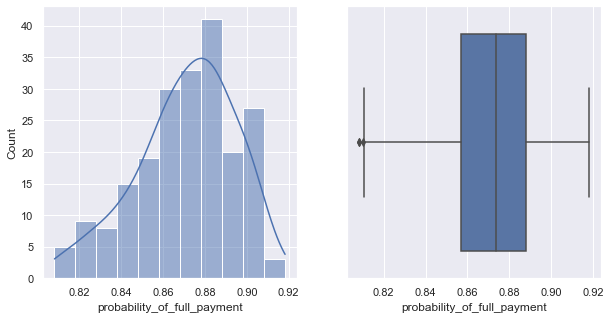

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[0])
sns.boxplot(x='probability_of_full_payment', data=df, ax=axes[1])

In [23]:
df["probability_of_full_payment"].describe().T

count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64

In [24]:
stats.skew(df.probability_of_full_payment)

-0.5341035521949097

#### Insights

* probability_of_full_payment: Probability of payment done in full by the customer to the bank ranges from a minimum of 0.8081 to maximum of  0.9183.

* The average probability_of_full_payment: Probability of payment done in full by the customer to the bank is around  0.8709.

* The standard deviation of the probability_of_full_payment: Probability of payment done in full by the customer to the bank is  0.0235.

* 25% , 50% (median) and 75 % of the  probability_of_full_payment: Probability of payment done in full by the customer to the bank are 0.856, 0.873 ,  and 0.887.

* Skewness indicating that the ditribution is slightly left skewed.

* probability_of_full_payment: Probability of payment done in full by the customer to the bank contains outlier.

<AxesSubplot:xlabel='current_balance'>

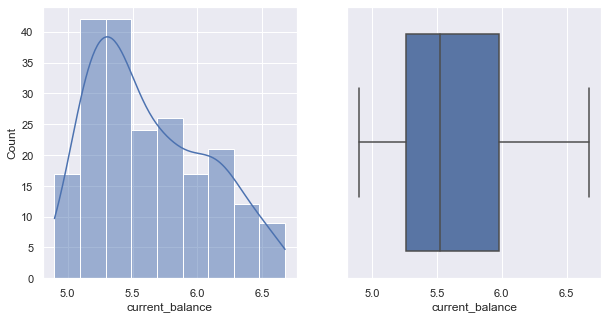

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['current_balance'], kde=True, ax=axes[0])
sns.boxplot(x='current_balance', data=df, ax=axes[1])

In [26]:
df["current_balance"].describe().T

count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64

In [27]:
stats.skew(df.current_balance)

0.5217206481959239

#### Insights

* current_balance: Balance amount left in the account to make purchases (in 1000s) ranges from a minimum of 4.899 to maximum of  6.675.

* The average current_balance: Balance amount left in the account to make purchases (in 1000s)is around  5.628.

* The standard deviation of the current_balance: Balance amount left in the account to make purchases (in 1000s) is  0.443.

* 25% , 50% (median) and 75 % of the current_balance: Balance amount left in the account to make purchases (in 1000s) are 5.262, 5.523 ,  and 5.979.

* Skewness indicating that the ditribution is slightly right skewed.

<AxesSubplot:xlabel='credit_limit'>

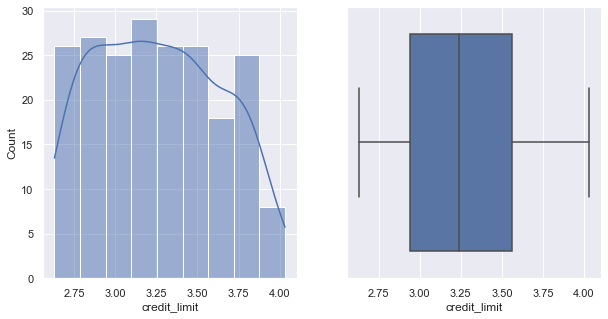

In [28]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['credit_limit'], kde=True, ax=axes[0])
sns.boxplot(x='credit_limit', data=df, ax=axes[1])

In [29]:
df["credit_limit"].describe().T

count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64

In [30]:
stats.skew(df.credit_limit)

0.13341648969738146

#### Insights

* credit_limit: Limit of the amount in credit card (10000s) ranges from a minimum of  2.630 to maximum of  4.033.

* The average credit_limit: Limit of the amount in credit card (10000s) is around 3.258.

* The standard deviation of the credit_limit: Limit of the amount in credit card (10000s) is  0.377.

* 25% , 50% (median) and 75 % of the credit_limit: Limit of the amount in credit card (10000s) are 2.944, 3.237 ,  and 3.561.

* Skewness indicating that the ditribution is slightly right skewed.

<AxesSubplot:xlabel='min_payment_amt'>

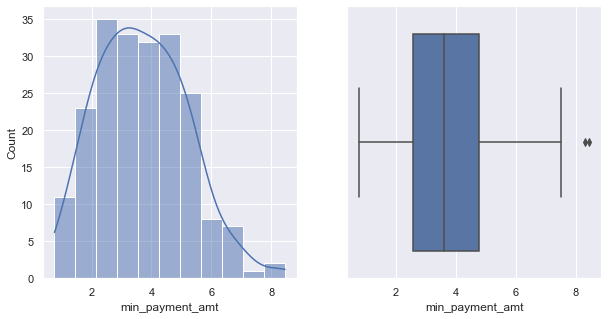

In [31]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['min_payment_amt'], kde=True, ax=axes[0])
sns.boxplot(x='min_payment_amt', data=df, ax=axes[1])

In [32]:
df["min_payment_amt"].describe().T

count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64

In [33]:
stats.skew(df.min_payment_amt)

0.3987925792256687

#### Insights

* min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s) ranges from a minimum of   0.765 to maximum of  8.456.

* The average min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s) is around 3.700.

* The standard deviation of the  min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)  is  1.494.

* 25% , 50% (median) and 75 % of the min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s) are 2.561 , 3.599 and 4.768.

* Skewness indicating that the ditribution is slightly right skewed.

* min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s) contains outliers.

<AxesSubplot:xlabel='max_spent_in_single_shopping'>

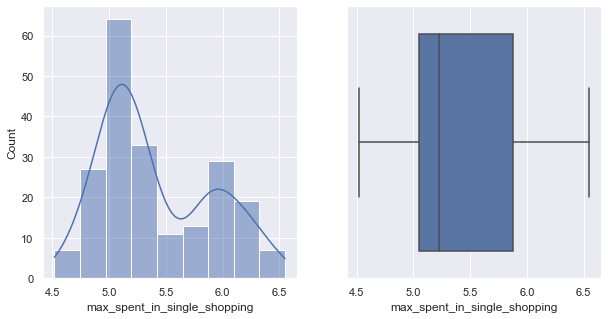

In [34]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['max_spent_in_single_shopping'], kde=True, ax=axes[0])
sns.boxplot(x='max_spent_in_single_shopping', data=df, ax=axes[1])

In [35]:
df["max_spent_in_single_shopping"].describe().T

count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64

In [36]:
stats.skew(df.max_spent_in_single_shopping)

0.5578758322317957

#### Insights

* max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s) ranges from a minimum of 4.519 to maximum of 6.550.

* The average max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s) is around 5.408.

* The standard deviation of the  max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s) is  0.491.

* 25% , 50% (median) and 75 % of the max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s) are 5.045 , 5.223 and  5.877.

* Skewness indicating that the ditribution is slightly right skewed.

#### Bi-variate Analysis

#### *Scatter Plot



A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

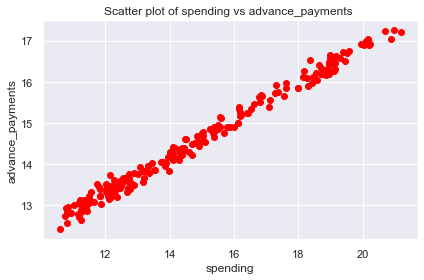

In [37]:
plt.scatter(df['spending'],df['advance_payments'],color="red")
plt.title("Scatter plot of spending vs advance_payments ")
plt.xlabel("spending")
plt.ylabel("advance_payments")
plt.tight_layout()
plt.show()

#### Insights

From the above plot we see that as the spending increases the advance_payments is also increasing showing a positive relationship.

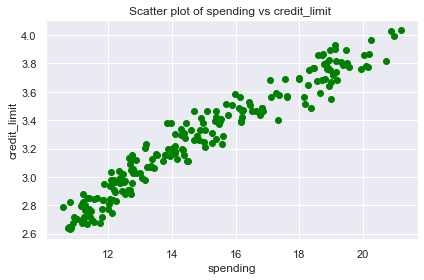

In [38]:
plt.scatter(df['spending'],df['credit_limit'],color="green")
plt.title("Scatter plot of spending vs credit_limit ")
plt.xlabel("spending")
plt.ylabel("credit_limit")
plt.tight_layout()
plt.show()

#### Insights

From the above plot we see that as the spending increases the credit_limit is also increasing showing a positive relationship.

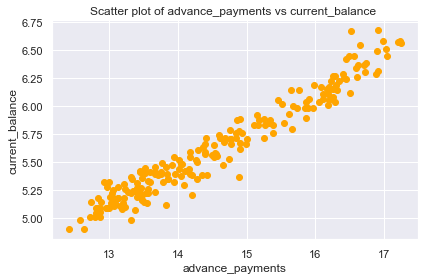

In [39]:
plt.scatter(df['advance_payments'],df['current_balance'],color="orange")
plt.title("Scatter plot of advance_payments vs current_balance ")
plt.xlabel("advance_payments")
plt.ylabel("current_balance")
plt.tight_layout()
plt.show()

#### Insights

From the above plot we see that as the advance_payments increases the current_balance is also increasing showing a positive relationship.

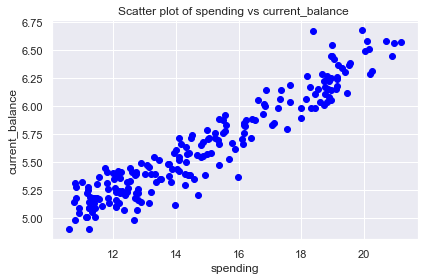

In [40]:
plt.scatter(df['spending'],df['current_balance'],color="blue")
plt.title("Scatter plot of spending vs current_balance ")
plt.xlabel("spending")
plt.ylabel("current_balance")
plt.tight_layout()
plt.show()

#### Insights

From the above plot we see that as the spending increases the current_balance is also increasing showing a positive relationship.

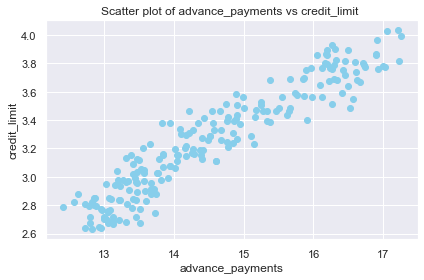

In [41]:
plt.scatter(df['advance_payments'],df['credit_limit'],color="skyblue")
plt.title("Scatter plot of advance_payments vs credit_limit ")
plt.xlabel("advance_payments")
plt.ylabel("credit_limit")
plt.tight_layout()
plt.show()

#### Insights

From the above plot we see that as the advance_payments increases the credit_limit is also increasing showing a positive relationship.

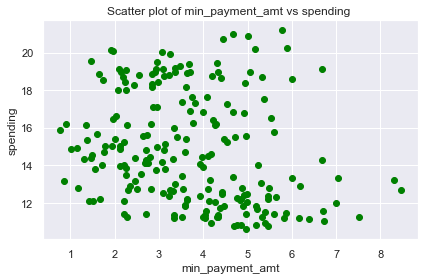

In [42]:
plt.scatter(df['min_payment_amt'],df['spending'],color="green")
plt.title("Scatter plot of min_payment_amt vs spending ")
plt.xlabel("min_payment_amt")
plt.ylabel("spending")
plt.tight_layout()
plt.show()

#### Insights

From the above plot we see that as the min_payment_amt and the spending is showing a poor relationship.

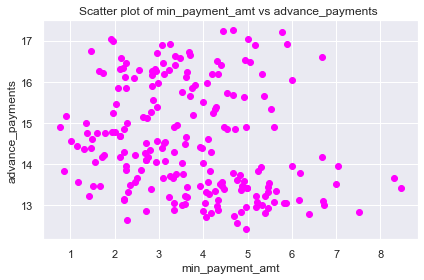

In [43]:
plt.scatter(df['min_payment_amt'],df['advance_payments'],color="magenta")
plt.title("Scatter plot of min_payment_amt vs advance_payments ")
plt.xlabel("min_payment_amt")
plt.ylabel("advance_payments")
plt.tight_layout()
plt.show()

#### Insights

From the above plot we see that as the min_payment_amt and the advance_payments is showing a poor relationship.

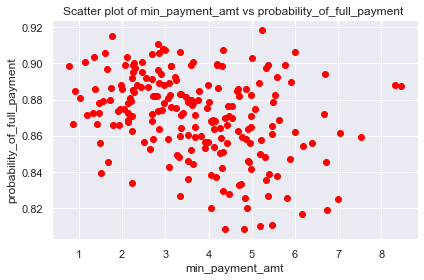

In [44]:
plt.scatter(df['min_payment_amt'],df['probability_of_full_payment'],color="red")
plt.title("Scatter plot of min_payment_amt vs probability_of_full_payment ")
plt.xlabel("min_payment_amt")
plt.ylabel("probability_of_full_payment")
plt.tight_layout()
plt.show()

#### Insights

From the above plot we see that as the min_payment_amt decreases the credit_limit is also decreasing showing a negetive relationship.

#### Multivariate Analysis

#### * Heatmap

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.Darker Shades have higher Correaltion , while lighter shades have smaller values of correaltion as compared to darker shades values.Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

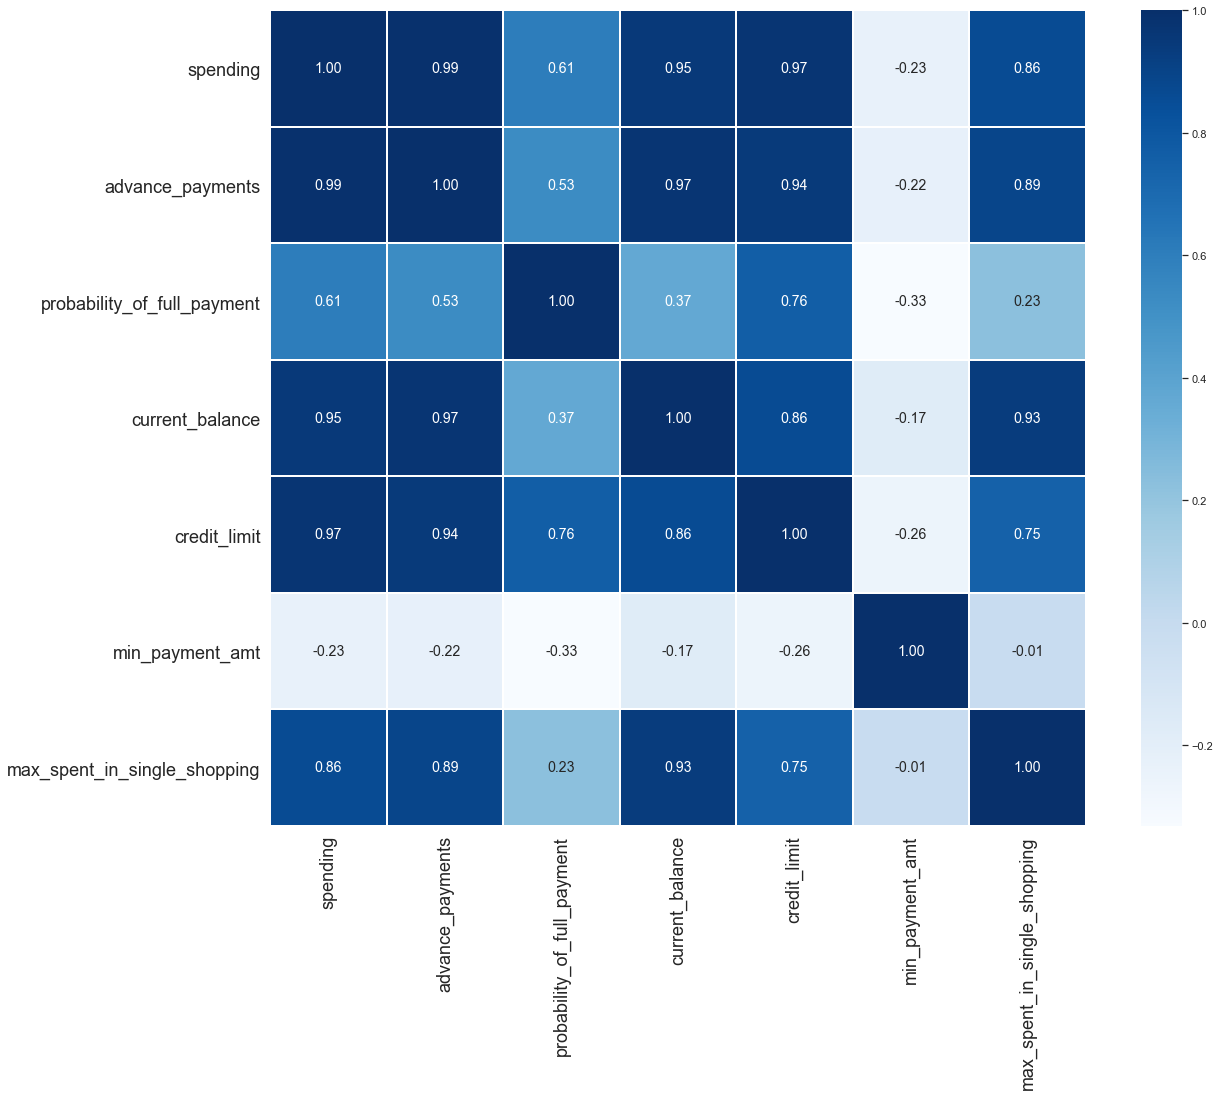

In [45]:
corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="Blues",linewidth=0.85,square=True,annot_kws={"size":14.14},fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(size=18)
plt.show()

#### Insights

From the above correlation table we conclude that,

* spending with advance_payments have max value of correlation is 0.99.

* spending with credit_limit have strong value of correlation 0.97. 

* advance_payments with current_balance also have a strong correaltion value  0.97.

* spending with current_balance also have a strong correaltion value  0.95.

* advance_payments with credit_limit also show significant correlation value of 0.94.

* min_payment_amt with spending  and min_payment_amt with advance_payments show poor correlation i.e. -0.23,-0.22.

* min_payment_amt with probability_of_full_payment have min value of correlation -0.33.

#### *Pairplot

Pairplot shows the relationship between the variables in the form of scatterplot and the distribution of the variable in the form of histogram.

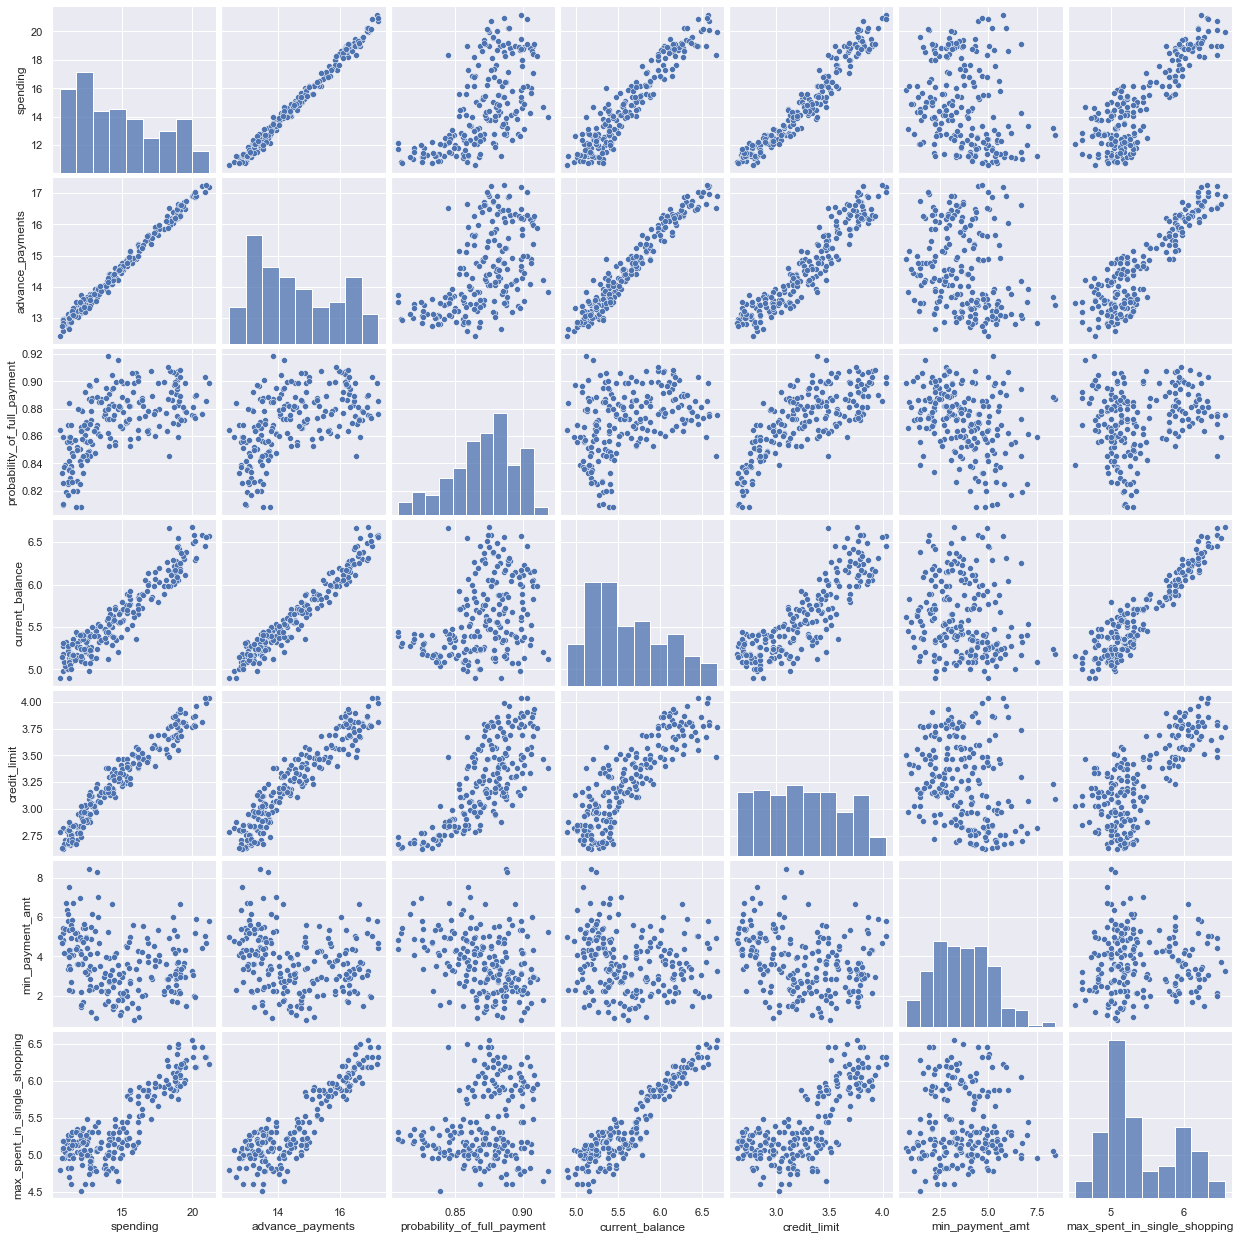

In [46]:
sns.pairplot(df)
plt.show()

#### Insights

From the graph, we can see that there is positive linear relationship between variables like spending and advance_payments , spending and credit_limit , advance_payments and current_balance , spending and current_balance.

#### Checking the Outliers in the dataset.

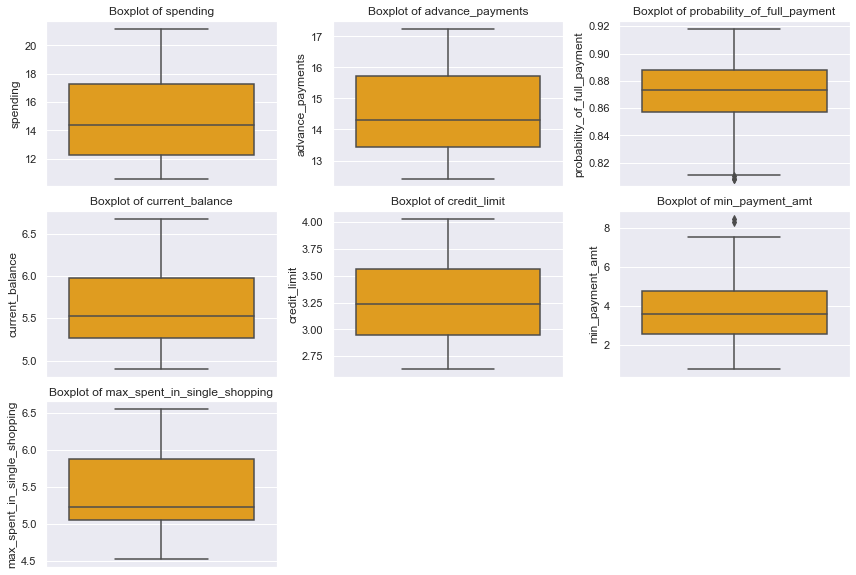

In [47]:
plt.figure(figsize= (12,16))
feature_list = df.columns
for i in range (len(feature_list)):
    plt.subplot(6,3 ,i+1)
    sns.boxplot(y= df[feature_list[i]],data=df,color="orange")
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

#### Conclusion

* As in the above plotted boxplots we found outliers in the probability_of_full_payment & min_payment_amt ,so we need to treat outliers as clustering results are affected by the presence of outliers.

#### Treatment of Outliers

In [48]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    return lower_limit , upper_limit

In [49]:
for i in feature_list:
    LL ,UL = remove_outlier(df[i])
    df[i]=np.where(df[i]<LL,LL,df[i])
    df[i]=np.where(df[i]>UL,UL,df[i])

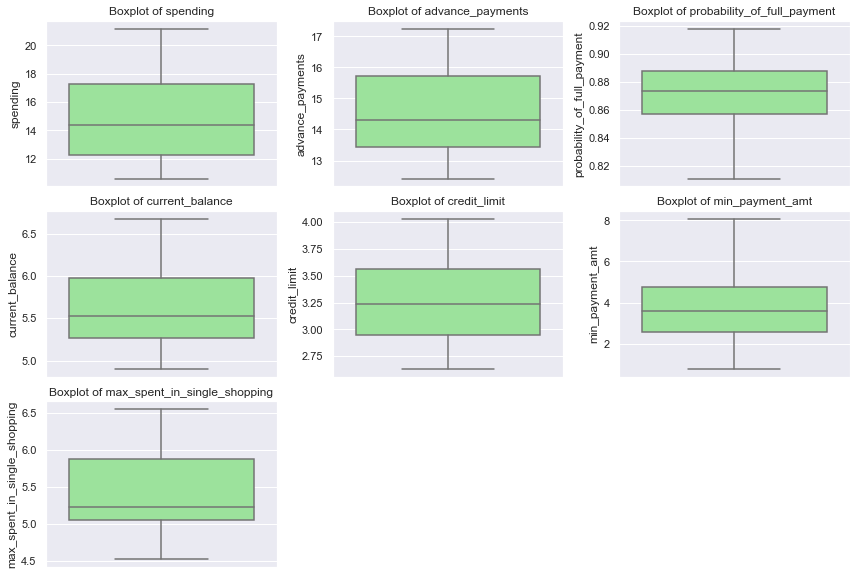

In [50]:
plt.figure(figsize= (12,16))
feature_list = df.columns
for i in range (len(feature_list)):
    plt.subplot(6,3 ,i+1)
    sns.boxplot(y= df[feature_list[i]],data=df,color="lightgreen")
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

#### Conclusion:

* As we sucessfully treated the outliers and from the above plotted boxplot, we clearly infer that their is no more outliers present in the dataset. Now we can do the scaling  and perform the further processes for clustering.

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

#### Conclusion:

* Yes,i think scaling is necessary for clustering in this case. As we all know that agglomerative cluserting is very sensitive to the outliers & Clustering algorithms such as K-means do need feature scaling before they are fed to the algorithm. Since, clustering techniques use Euclidean Distance to form the cohorts, it will be wise to do scaling before calculating the distance.

* When we perform a distance based model or work on disatnce based algorithm scaling or normalization is a requirement. We can either go for Z-Score sacling or Min-Max normalization technique , but in this case we go with Z-Score as per the nature of the given data set as the given data set have afew outliers in ,but not so extreme and the given data set also approaches the normality.That's why we are using z-score scaling on the dataset.


#### Scaling of the Dataset.

In [51]:
from scipy.stats import zscore

In [52]:
df_scaled=df.apply(zscore)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


#### 5 Number Sumarray of Scaled Data

In [53]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.642601e-15,1.002389,-2.571391,-0.600968,0.103172,0.712647,2.011371
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,1.512018e-16,1.002389,-1.966425,-0.761698,-0.065915,0.718559,2.938945
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


#### Insights

* After zscore scaling the mean of the variables becomes zero and std is equals to 1.

* Scaling changes the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

##### Step:1 Importing the necessary python package & functions for  Hierarchical Clustering.

In [54]:
from scipy.cluster.hierarchy import dendrogram , linkage

* Dendrogram function for visualization of the clusters formed.

* Linkage function is for computing the distances and merging the clusters.

##### Step:2 Create linkage for clustering , here we are going to use the average linkage.

In [55]:
link = linkage(df_scaled, method = 'average')

* Now the linkage stores the various distances at which the n-clusters are sequentially merged.

In [56]:
link #This information used by the dendrogram to create visuals for us.

array([[1.90000000e+01, 2.30000000e+01, 1.93561325e-01, 2.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 2.10880708e-01, 2.00000000e+00],
       [7.00000000e+00, 3.00000000e+01, 2.11416263e-01, 2.00000000e+00],
       [9.50000000e+01, 1.26000000e+02, 2.19575820e-01, 2.00000000e+00],
       [7.00000000e+01, 1.16000000e+02, 2.41240086e-01, 2.00000000e+00],
       [1.48000000e+02, 2.07000000e+02, 2.59139938e-01, 2.00000000e+00],
       [1.27000000e+02, 1.57000000e+02, 2.71769302e-01, 2.00000000e+00],
       [7.60000000e+01, 1.31000000e+02, 2.87275484e-01, 2.00000000e+00],
       [6.70000000e+01, 1.72000000e+02, 2.91364436e-01, 2.00000000e+00],
       [4.00000000e+00, 2.20000000e+01, 2.91569402e-01, 2.00000000e+00],
       [7.10000000e+01, 1.51000000e+02, 2.97134664e-01, 2.00000000e+00],
       [1.85000000e+02, 2.06000000e+02, 3.19058136e-01, 2.00000000e+00],
       [9.90000000e+01, 1.59000000e+02, 3.34862969e-01, 2.00000000e+00],
       [9.00000000e+00, 1.37000000e+02, 3.37994916e

##### Step:3 Visualization & Cutting the Dendrogram with suitable clusters.

* A dendrogram is a network structure. It is constituted of a root node that gives birth to several nodes connected by edges or branches.




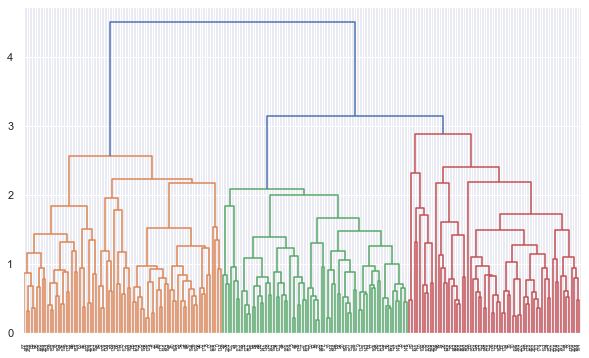

In [57]:
plt.figure(figsize=(10,6))
dend=dendrogram(link)

* Lets see more readable and visualize form of dendrogram with some additional parameters , which will give us neater & clearer output of the dendrogram.

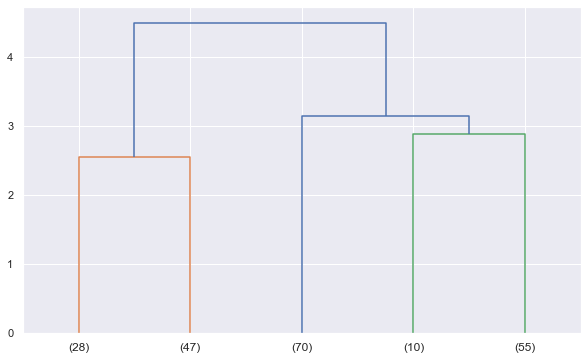

In [58]:
plt.figure(figsize=(10,6))
dend =dendrogram(link , truncate_mode='lastp',p=5)

#### Insights

* From the above plot we observe the last 5 merges and the number of observations in each merge.Cluster 1 have maximum observations.

##### Step:4  Importing the fcluster module to create optimum number of clusters.

In [59]:
from scipy.cluster.hierarchy import fcluster

In [60]:
# Method ------ Maxclust

agg_clusters = fcluster(link,3,criterion="maxclust")
agg_clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

#### Insights

* From the maxclsut criterion fuction we obtain the 3 clusters , i.e. cluster 1 , cluster 2 & cluster 3.

##### Step:5 Appending the clusters into the original dataset.

In [61]:
df["agg_clusters"]= agg_clusters

In [62]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,agg_clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,3
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,2
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,2
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,2


##### Step:6 Cluster Frequency

In [63]:
df["agg_clusters"].value_counts().sort_index()

1    75
2    70
3    65
Name: agg_clusters, dtype: int64

#### Insights

* Cluster 1 consists of 75 customers.

* Cluster 2 consists of 70 customers.

* Cluster 3 consists of 65 customers.

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.



##### Step:1 Importing the necessary python package & functions for K-Means Clustering.

In [64]:
from sklearn.cluster import KMeans 


##### Step:2 Plot the WSS Plot (Elbow Curve) .

In [65]:
wss =[]
for i in range(1,8):
    k_means = KMeans(n_clusters=i,random_state=1)
    k_means.fit(df_scaled)
    wss.append(k_means.inertia_)

In [66]:
x=[1,2,3,4,5,6,7]

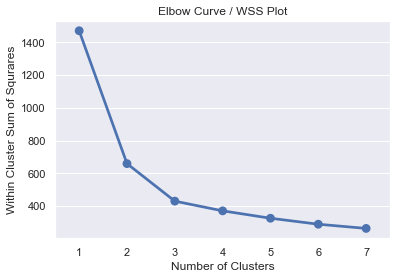

In [67]:
sns.pointplot(x,wss)
plt.title("Elbow Curve / WSS Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squrares")
plt.show()

##### Step:3 Checking the Within Cluster Sum of Squrares . Forming clusters with K = 1,2,3,4,5,6,7 and comparing the WSS to determine optimum number clusters.

In [68]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

1469.999999999999

In [69]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

659.14740095485

In [70]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

430.298481751223

In [71]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

371.0356644664012

In [72]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

325.9741284729876

In [73]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

289.45524862464833

In [74]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

263.859944426353

##### Step4: Cluster evaluation - Forming clusters with K = 3,4,5 comparing their silhouette_score

In [75]:
from sklearn.metrics import  silhouette_score , silhouette_samples

In [76]:
k_means = KMeans(n_clusters =3,random_state=1)
k_means.fit(df_scaled)
labels=k_means.labels_
silhouette_score(df_scaled,labels,random_state=1)


0.4008059221522216

In [77]:
k_means = KMeans(n_clusters =4,random_state=1)
k_means.fit(df_scaled)
labels=k_means.labels_
silhouette_score(df_scaled,labels,random_state=1)



0.3373662527862716

In [78]:
k_means = KMeans(n_clusters =5,random_state=1)
k_means.fit(df_scaled)
labels=k_means.labels_
silhouette_score(df_scaled,labels,random_state=1)



0.28606972536882685

#### Result:

From within cluster sum of squares and above plotted elbow curve  we observe WSS reduces when k value increases. After third cluster the drop in the within cluster sum of square is not so effective and silhouette_score for k=3 is 0.40080 which is better than k=4 (silhouette_score-0.33736) & k=5 (silhouette_score-0.28606) , so we end up with 3 optimum number clusters for buliding K-Means clustering model.

#### Step:4 Creating Clusters using K-Means

In [79]:
k_means = KMeans(n_clusters =3,random_state=1)
k_means.fit(df_scaled)
labels=k_means.labels_


#### Step5: Cluster Output for all the observations.

In [80]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2], dtype=int32)

##### Step:6 Appending Clusters to the original dataset

In [81]:
df["Clus_kmeans3"] = labels
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,agg_clusters,Clus_kmeans3
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,3,2
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,2,0
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1,1
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,3,0
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,2,0
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,2,2
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1,1
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,2,0


##### Step:7 Checking the mapping of the datapoints to the clusters is correct or not ?

In [82]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [83]:
silhouette_score(df_scaled,labels)

0.4008059221522216

In [84]:
sil_width = silhouette_samples(df_scaled,labels)
sil_width

array([0.5732776 , 0.36556355, 0.63709249, 0.515595  , 0.36097201,
       0.22152508, 0.47529542, 0.36025848, 0.51938329, 0.53443903,
       0.46599399, 0.12839864, 0.39177784, 0.52379458, 0.11202082,
       0.22512083, 0.33760956, 0.5018087 , 0.03635503, 0.23801566,
       0.36177434, 0.3693663 , 0.43153403, 0.26364196, 0.47484293,
       0.06663956, 0.27151643, 0.50414367, 0.55487254, 0.43479958,
       0.37528473, 0.43006502, 0.39151526, 0.3943622 , 0.5362567 ,
       0.55717776, 0.50878421, 0.42617776, 0.50641159, 0.62170114,
       0.55929539, 0.48579454, 0.39864428, 0.61044051, 0.51398993,
       0.37791063, 0.30664315, 0.58154614, 0.48759463, 0.53302467,
       0.31693425, 0.49463828, 0.58531649, 0.59861082, 0.61892471,
       0.23370264, 0.44475373, 0.54060572, 0.57808265, 0.57623567,
       0.55297302, 0.51585343, 0.55579575, 0.27793624, 0.49524145,
       0.56405298, 0.57784591, 0.52274801, 0.6313322 , 0.08521853,
       0.44260057, 0.3237709 , 0.54096805, 0.5820664 , 0.29582

In [85]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,agg_clusters,Clus_kmeans3,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,0,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1,0.360972


#### Result:

From the above perform  activities we conclude that 

* silhouette_score is postive and good enough for k=3 shows clusters are merged correctly.

* sil_width of the all the obersrvations are positive also shows that the mapping to clusters is performed correctly.

* As our both functions silhouette_score & sil_width tells us that we merges the cluster and maps the obersrvations correctly.

##### Step:8 Cluster Frequency

In [86]:
df["Clus_kmeans3"].value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans3, dtype: int64

#### Insights

* Cluster 0 consists 72 customers.

* Cluster 1 consists 67 customers.

* Cluster 2 consists 71 customers.

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.



#### Cluster Profiles of K-Means Clustering 

In [87]:
clust_profile=df.drop(["agg_clusters","sil_width"],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


In [139]:
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,agg_clusters,Clus_kmeans3,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,0,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1,0.360972
...,...,...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.888000,5.439,3.199,3.986,4.738,3,2,0.308036
206,16.77,15.62,0.863800,5.927,3.438,4.920,5.795,1,1,0.267423
207,14.03,14.16,0.879600,5.438,3.201,1.717,5.001,3,2,0.505922
208,16.12,15.00,0.900000,5.709,3.485,2.270,5.443,3,2,0.257174


#### Visualization of the Clusters Profiles Across the Variables.

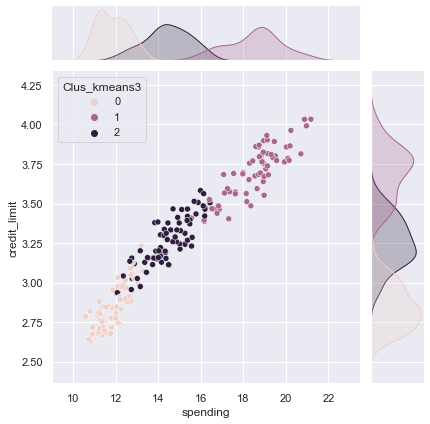

In [149]:
sns.jointplot(df["spending"],df["credit_limit"],hue="Clus_kmeans3",data=df)

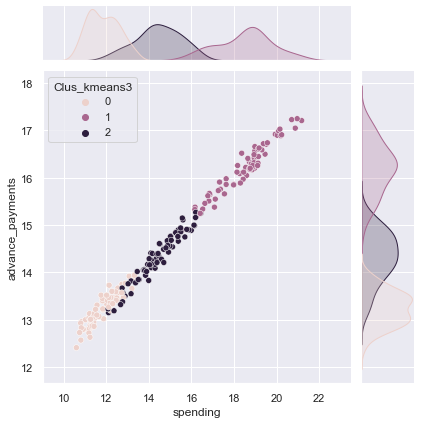

In [151]:
sns.jointplot(df["spending"],df["advance_payments"],hue="Clus_kmeans3",data=df)

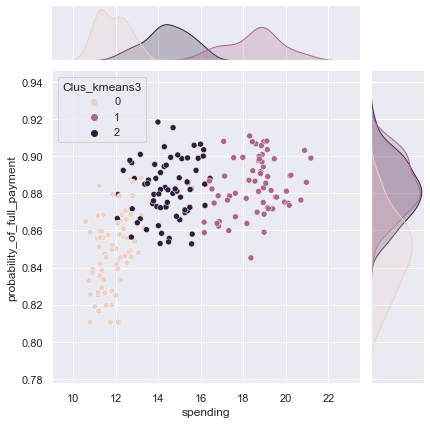

In [152]:
sns.jointplot(df["spending"],df["probability_of_full_payment"],hue="Clus_kmeans3",data=df)

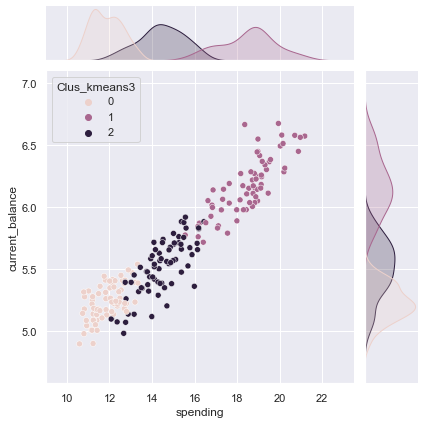

In [153]:
sns.jointplot(df["spending"],df["current_balance"],hue="Clus_kmeans3",data=df)

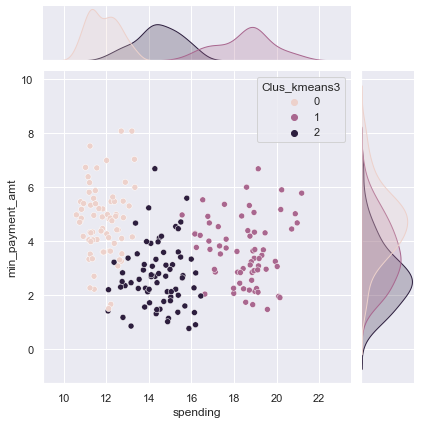

In [154]:
sns.jointplot(df["spending"],df["min_payment_amt"],hue="Clus_kmeans3",data=df)

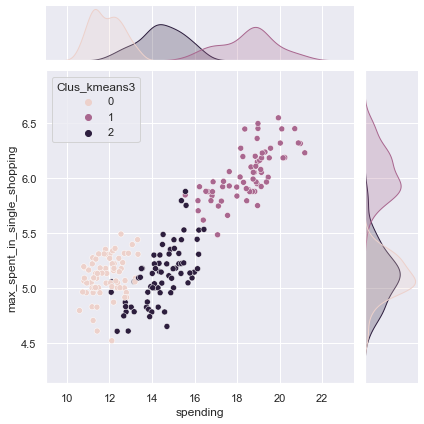

In [155]:
sns.jointplot(df["spending"],df["max_spent_in_single_shopping"],hue="Clus_kmeans3",data=df)

#### Insights

As we applied two differnt clustering algorithms to do the customer segmentaion.The clusters formed were nearly identical. We can classify the cluster  into 3 differnt profiles,namely:

* Cluster 0 - High risk customers with low advance_payments and probability_of_full_payment.

* These customers have low current_balance,credit_limit ,max_spent_in_single_shopping,but high min_payment_amt.


* Cluster 1 - Low risk customers with high advance_payments and probability_of_full_payment.

* These customers have high spending,current_balance,credit_limit, max_spent_in_single_shopping but less min_payment_amt.


* Cluster 2 - Moderate risk customers with high advance_payments and probability_of_full_payment as compared to the cluster 0 customers.

* These customers have high spending, current_balance, credit_limit,	max_spent_in_single_shopping than cluster 0 Customers.

#### Recommendations

* The customers in Cluster 1 have high,advance_payments and probability_of_full_payment,credit_limit. So,bank can promote various insta loan schemes to these customers.

* The customers in Cluster 0 ,2 have low, credit_limit So,bank can intoduces various credit_limit enhancement schemes to these customers.

* The customers in Cluster 1 have high,spending , max_spent_in_single_shopping but higher min_payment_amt than cluster 2 customers So,bank can intoduces various min_payment_amt schemes to the cluster 1 customers.


* Maximum max_spent_in_single_shopping is high for cluster1 , so can be offered discount/offer on next transactions upon full payment.Increase their credit limit based on spending habits.Give loan against the credit card, as they are customers with good repayment record.Tie up with brands, which will drive more one_time_maximum spending.


* Cluster 2 customers are the potential target customers who are paying bills, purchasing using credit cards and maintaining comparatively good credit score. So, we can increase credit limit or can lower down interest rate as seasonal offers and study the behavior further.Promote premium/loyalty card to increase transactions.Increase spending habits by giving offers on ecommerce sites, travel portal, travel airlines/hotel, as this will encourage them to spend more.

* Customers of cluster 0 should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.Offer seasonal discounts on festivals.Increase their spending habits by tying up with grocery stores, utilities (electricity, phone, gas, others)






### Problem  Statement 2 : CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### EDA - Data Description , Data Preprocessing , Data Visualization , Data preparation.

#### Loading the Dataset CSV file of Problem Statement 2.

In [89]:
df_1=pd.read_csv("insurance_data.csv")

#### Checking the Records of the Dataset.

In [90]:
df_1.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


#### Data Dictionary for Problem Statment 2.

1. Target: Claim Status (Claimed)

2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Distribution channel of tour insurance agencies (Channel)

5. Name of the tour insurance products (Product)

6. Duration of the tour (Duration)

7. Destination of the tour (Destination)

8. Amount of sales of tour insurance policies (Sales)

9. The commission received for tour insurance firm (Commission)

10. Age of insured (Age)



#### Checking the Summary of the Dataset.

In [91]:
df_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above table we can infer the -

* count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset.

* Unique , top and frequency for the categorical variables present in the dataset.

* There is bad values found in the dataset duration and Commision , i.e. Duration minimum value is -1 which is not possible.As we know commision is usually in the percentage form & we found here max value of commision is 210.21 and even commision have many values which are more than 100% ,which is a bad value as we know percentage can't exceeds more than 100.Thus , we need to treat & clean them.

#### Checking the Shape of the Dataframe.

In [92]:
df_1.shape

(3000, 10)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The insurance_data.csv data set has 3000 observations (rows) and 10 variables (columns) in the dataset.


#### Checking the Appropriateness of Datatypes & Information of the Dataframe.

In [93]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


From the above results we can see that there is no missing value present in the dataset.Their are total 3000 rows & 10 columns in this dataset,indexed from 0 to 2999.  Datatypes of 2 variables are int64, datatypes of 6 variables are object and datatypes of 2 variables are float64. Memory used by the dataset: 234.5+ KB.

#### Checking for Null Values.

In [94]:
df_1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

No Null Values present in the dataset.

#### Checking for Anomalies in the Dataset.

In [95]:
df_1["Age"].unique()

array([48, 36, 39, 33, 45, 61, 37, 43, 52, 31, 23, 29, 28, 27, 44, 46, 25,
       60, 30, 40, 32, 26, 38, 42, 51, 24, 59, 41, 56, 35, 58, 73, 47, 50,
       22, 20, 53, 68, 34, 79, 19, 21, 66, 69, 57, 63, 54, 64, 71, 49, 62,
       84, 17, 55, 76, 72, 65, 67, 75, 70, 18, 77, 14, 81, 74,  8, 16, 83,
       15, 11])

In [96]:
df_1["Agency_Code"].unique()

array(['C2B', 'EPX', 'CWT', 'JZI'], dtype=object)

In [97]:
df_1["Type"].unique()

array(['Airlines', 'Travel Agency'], dtype=object)

In [98]:
df_1["Claimed"].unique()

array(['No', 'Yes'], dtype=object)

In [99]:
df_1["Commision"].unique()

array([7.0000e-01, 0.0000e+00, 5.9400e+00, 6.3000e+00, 1.5750e+01,
       3.5640e+01, 4.6960e+01, 1.5880e+01, 5.8800e+00, 2.3760e+01,
       5.4000e+01, 5.9400e+01, 1.8200e+01, 1.7250e+01, 6.2500e+00,
       1.4000e+01, 2.5550e+01, 7.7000e+00, 1.5000e+01, 2.0380e+01,
       9.7500e+00, 1.6250e+01, 7.3800e+00, 3.1500e+00, 4.0250e+01,
       1.1550e+01, 8.3800e+00, 6.3210e+01, 4.1580e+01, 7.6400e+00,
       1.0500e+01, 2.3500e+01, 4.8300e+01, 2.2130e+01, 4.8000e+00,
       6.7500e+00, 1.1750e+01, 5.2330e+01, 5.2500e+00, 9.1000e+00,
       8.8800e+00, 8.3250e+01, 3.8000e-01, 2.6630e+01, 7.7000e-01,
       6.0000e+00, 5.3460e+01, 1.2250e+01, 1.7550e+01, 2.0000e+01,
       1.7820e+01, 7.7220e+01, 1.1880e+01, 1.2950e+01, 1.4937e+02,
       2.9700e+01, 2.7300e+01, 2.8500e+01, 4.5000e+00, 5.8500e+00,
       4.1420e+01, 2.0130e+01, 4.9730e+01, 4.2500e+00, 4.8420e+01,
       5.3800e+00, 1.3630e+01, 2.2000e+01, 1.0692e+02, 8.3160e+01,
       4.7520e+01, 6.9710e+01, 6.4800e+01, 3.6400e+01, 5.0000e

In [100]:
df_1["Channel"].unique()

array(['Online', 'Offline'], dtype=object)

In [101]:
df_1["Duration"].unique()

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

In [102]:
df_1["Sales"].unique()

array([2.5100e+00, 2.0000e+01, 9.9000e+00, 2.6000e+01, 1.8000e+01,
       4.5000e+01, 5.9400e+01, 8.0000e+01, 1.4000e+01, 4.3000e+01,
       1.8785e+02, 6.3500e+01, 1.1000e+02, 2.3500e+01, 3.9600e+01,
       2.1600e+02, 4.2000e+01, 9.9000e+01, 5.2000e+01, 3.2000e+01,
       6.2000e+01, 6.9000e+01, 2.5000e+01, 5.1000e+01, 4.0000e+01,
       3.0000e+01, 2.7000e+01, 5.0000e+01, 2.2000e+01, 6.0000e+01,
       8.1500e+01, 3.7000e+01, 3.9000e+01, 5.6000e+01, 2.8000e+01,
       2.9500e+01, 1.1240e+01, 2.4000e+01, 1.6100e+02, 3.3000e+01,
       1.7000e+01, 3.3500e+01, 2.5285e+02, 1.0000e+01, 2.3000e+01,
       6.9300e+01, 3.0550e+01, 1.9000e+01, 1.1200e+02, 9.5000e+01,
       9.4000e+01, 1.9320e+02, 8.8500e+01, 1.9200e+01, 1.1000e+01,
       7.5000e+01, 4.7000e+01, 2.0930e+02, 2.1000e+01, 1.5000e+02,
       3.5500e+01, 3.3300e+02, 1.3500e+00, 1.0650e+02, 2.7600e+00,
       2.9000e+01, 1.5000e+01, 8.9100e+01, 3.5000e+01, 3.8000e+01,
       2.9700e+01, 1.2000e+01, 1.2870e+02, 1.9800e+01, 0.0000e

In [103]:
df_1["Product Name"].unique()

array(['Customised Plan', 'Cancellation Plan', 'Bronze Plan',
       'Silver Plan', 'Gold Plan'], dtype=object)

In [104]:
df_1["Destination"].unique()

array(['ASIA', 'Americas', 'EUROPE'], dtype=object)

No Anomalies found in the Dataset.

#### Checking the Value counts on all the Categorical Column.

In [105]:
df_1["Agency_Code"].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

* There are 4 Agency_Code present in the data set named as 'EPX' , 'C2B'  , 'CWT' , 'JZI'.

* 1365 customers have Agency_Code 'EPX' which is the max among all 4 Agency_Code present in the data.

* 239 customers have Agency_Code 'JZI' which is the min among all 4 Agency_Code present in the data.


In [106]:
df_1["Type"].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

* Most of the customers prefer Travel Agency as their tour insurance firm. 

In [107]:
df_1["Claimed"].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

* 924 customers Claim their insurance.

* 2076 didn't Claim their insurance.

In [108]:
df_1["Channel"].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

* 2954 customers choose online channel.

* Only 46 customers choose offline channel.

In [109]:
df_1["Product Name"].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

* Customised Plan is the most purcahsed insurance plan by the customers with a value count of 1136.

* Gold Plan is the least purcahsed insurance plan by the customers with a value count of 109.



In [110]:
df_1["Destination"].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

* Asia is most preferred Destination of the tour.

* Europe is least preferred Destination of the tour.

#### Observation

There is no missing value & bad value present in the above categorical variables.

#### Treatment of Bad Values

* As we found that Duration min value found to be inappropirate , so we need cleaned that.We know that min value for duration of the tour can't be -1. But in Duration (Duration of the tour) we found min value of -1 this has to be cleaned.

In [111]:
df_1[df_1['Duration']<0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


From above records we observe that '-1' in Duration has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.Here we are impute this with median.

In [112]:
df_1["Duration"]=np.where(df_1["Duration"]==-1,df_1["Duration"].median(),df_1["Duration"])

In [113]:
df_1.iloc[1508]

Age                      25
Agency_Code             JZI
Type               Airlines
Claimed                  No
Commision               6.3
Channel              Online
Duration               26.5
Sales                  18.0
Product Name    Bronze Plan
Destination            ASIA
Name: 1508, dtype: object

In [114]:
df_1['Duration'].describe()

count    3000.000000
mean       70.010500
std       134.049397
min         0.000000
25%        11.000000
50%        26.750000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

We have successfully impute the bad value present in Duration with median value. 

* As we found that Commision have values that are  inappropirate , so we need cleaned that.We know that Commision is always is % and % is not more than 100.As we found many values in Commision (The commission received for tour insurance firm) is more than 100% so we need to clean them. 

In [115]:
df_1[df_1['Commision']>100]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
133,44,CWT,Travel Agency,Yes,149.37,Online,366.0,229.80,Silver Plan,Americas
186,53,CWT,Travel Agency,Yes,106.92,Online,64.0,178.20,Customised Plan,Americas
239,32,C2B,Airlines,Yes,126.75,Online,90.0,507.00,Silver Plan,ASIA
246,39,CWT,Travel Agency,Yes,210.21,Online,368.0,323.40,Gold Plan,Americas
323,54,CWT,Travel Agency,No,100.98,Online,18.0,0.00,Customised Plan,Americas
448,24,C2B,Airlines,Yes,103.00,Online,166.0,412.00,Silver Plan,ASIA
511,52,C2B,Airlines,Yes,108.00,Online,367.0,432.00,Silver Plan,ASIA
529,33,CWT,Travel Agency,Yes,208.16,Online,368.0,320.25,Gold Plan,Americas
631,31,CWT,Travel Agency,Yes,112.86,Online,175.0,188.10,Customised Plan,EUROPE
734,60,CWT,Travel Agency,Yes,166.53,Online,365.0,256.20,Gold Plan,Americas


From above records we observe that values more than'100' in Commision has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.Here we are impute this with median.

In [116]:
df_1["Commision"]=np.where(df_1["Commision"]>100,df_1["Commision"].median(),df_1["Commision"])

In [117]:
df_1.iloc[133]

Age                        44
Agency_Code               CWT
Type            Travel Agency
Claimed                   Yes
Commision                4.63
Channel                Online
Duration                366.0
Sales                   229.8
Product Name      Silver Plan
Destination          Americas
Name: 133, dtype: object

In [118]:
df_1.iloc[186]

Age                          53
Agency_Code                 CWT
Type              Travel Agency
Claimed                     Yes
Commision                  4.63
Channel                  Online
Duration                   64.0
Sales                     178.2
Product Name    Customised Plan
Destination            Americas
Name: 186, dtype: object

In [119]:
df_1.iloc[323]

Age                          54
Agency_Code                 CWT
Type              Travel Agency
Claimed                      No
Commision                  4.63
Channel                  Online
Duration                   18.0
Sales                       0.0
Product Name    Customised Plan
Destination            Americas
Name: 323, dtype: object

In [120]:
df_1['Commision'].describe()

count    3000.000000
mean       12.537687
std        19.598981
min         0.000000
25%         0.000000
50%         4.630000
75%        15.600000
max        99.900000
Name: Commision, dtype: float64

We have successfully impute the bad value present in Commision with the median value.Now the Range of Commision is from 0 to 99.90%.

#### Checking  Duplicate Values.

In [121]:
dups= df_1.duplicated()
print("Number of Duplicated Row in the Dataset = %d" %(dups.sum()))


Number of Duplicated Row in the Dataset = 139


In [122]:
df_1.drop_duplicates(inplace=True)

In [123]:
df_1.shape

(2861, 10)

Succesfully dropped all the duplicated values from the dataset.After Removing duplicates there are 2861 Rows and 10 Columns present in the dataset.

#### Univariate Analysis of Numerical  Variables.

#### *Histogram & Boxplot

* A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. It is possible to represent the distribution of several variable on the same axis using this technique.

* A boxplot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

<AxesSubplot:xlabel='Age'>

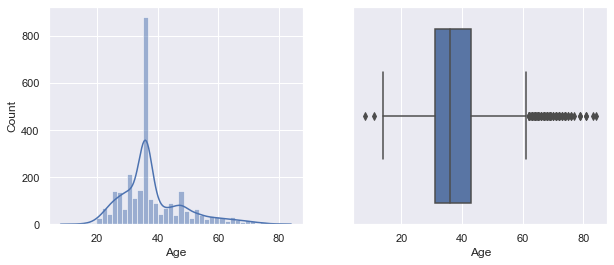

In [124]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Age'], kde=True, ax=axes[0])
sns.boxplot(x='Age', data=df_1, ax=axes[1])



In [125]:
df_1["Age"].describe().T

count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64

In [126]:
stats.skew(df_1.Age)

1.1025661500650201

#### Insight

* Age: Age of insured ranges from a minimum of 8to maximum of  84.

* The average Age:Age of insured is around 38.20.

* The standard deviation of the Age:Age of insured is 10.67.

* 25% , 50% (median) and 75 % of the Age:Age of insured are 31 , 36 and 43.

* Skewness indicating that the ditribution is slightly right skewed.

* Age:Age of insured have outliers.

<AxesSubplot:xlabel='Commision'>

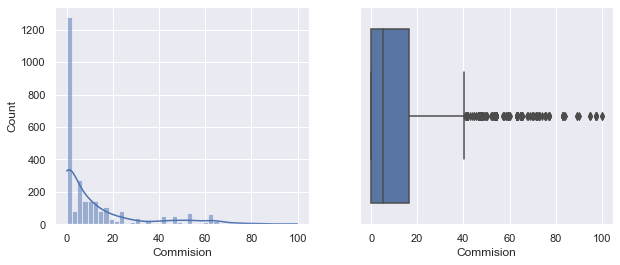

In [127]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Commision'], kde=True, ax=axes[0])
sns.boxplot(x='Commision', data=df_1, ax=axes[1])




In [128]:
df_1["Commision"].describe().T

count    2861.000000
mean       12.992723
std        19.775132
min         0.000000
25%         0.000000
50%         5.000000
75%        16.250000
max        99.900000
Name: Commision, dtype: float64

In [129]:
stats.skew(df_1.Commision)

1.9082464095013183

#### Insights

* Commision: The commission received for tour insurance firm ranges from a minimum of 0 to maximum of  99.90.

* The average Commision:The commission received for tour insurance firm is around 12.99.

* The standard deviation of the Commision:The commission received for tour insurance firm is 19.77.

* 25% , 50% (median) and 75 % of the Commision:The commission received for tour insurance firm  are 0 , 5 and 16.25.

* Skewness indicating that the ditribution is slightly right skewed.

* Commision:The commission received for tour insurance firm  have outliers.

<AxesSubplot:xlabel='Duration'>

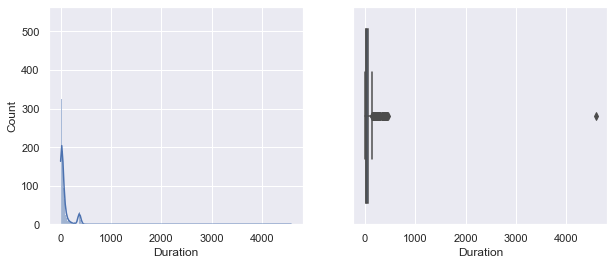

In [130]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Duration'], kde=True, ax=axes[0])
sns.boxplot(x='Duration', data=df_1, ax=axes[1])




In [131]:
df_1["Duration"].describe().T

count    2861.000000
mean       72.129850
std       135.973001
min         0.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64

In [132]:
stats.skew(df_1.Duration)

13.779972602601612

#### Insights

* Duration:Duration of the tour ranges from a minimum of 0 to maximum of  4580.

* The average Duration:Duration of the tour is around  72.12.

* The standard deviation of the Duration:Duration of the tour is 135.97.

* 25% , 50% (median) and 75 % of the Duration:Duration of the tour are 12 , 28 and 66.

* Skewness indicating that the ditribution is slightly right skewed.

* Duration:Duration of the tour have outliers.

<AxesSubplot:xlabel='Sales'>

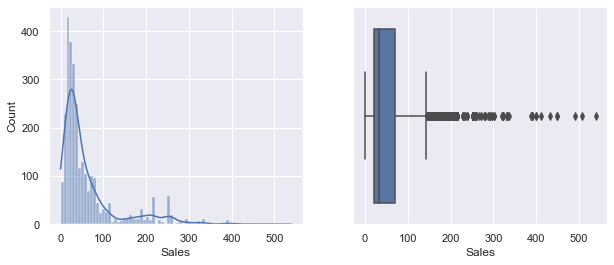

In [133]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,4)
sns.histplot(df_1['Sales'], kde=True, ax=axes[0])
sns.boxplot(x='Sales', data=df_1, ax=axes[1])



In [134]:
df_1["Sales"].describe().T

count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64

In [135]:
stats.skew(df_1.Sales)

2.3434132352067008

#### Insights

* Sales:Amount of sales of tour insurance policies ranges from a minimum of 0 to maximum of 539.

* The average Sales:Amount of sales of tour insurance policies  is around  61.75.

* The standard deviation of the Sales:Amount of sales of tour insurance policies is 71.39.

* 25% , 50% (median) and 75 % of the Sales:Amount of sales of tour insurance policies are 20 , 33 and 69.

* Skewness indicating that the ditribution is slightly right skewed.

* Sales:Amount of sales of tour insurance policies have outliers.

#### Univariate Analysis of Categorical Variables.

#### *Countplot

* A countplot is kind of like a histogram or a bar graph for categorical variables.

In [136]:
df_1["Agency_Code"].value_counts(normalize=True)

EPX    0.432716
C2B    0.319119
CWT    0.164628
JZI    0.083537
Name: Agency_Code, dtype: float64

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

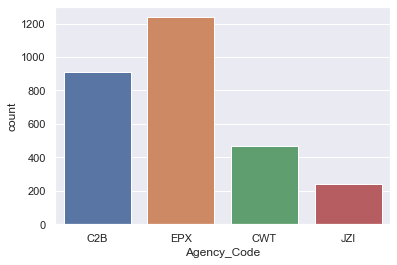

In [137]:
sns.countplot(x='Agency_Code', data=df_1)

#### Insights

* There are 4 Agency_Code present in the data set named as 'EPX' , 'C2B' , 'CWT' , 'JZI'.

* 43.27% customers have Agency_Code 'EPX' which is the max among all 4 Agency_Code present in the data.

* Only 8.3% customers have Agency_Code 'JZI' which is the min among all 4 Agency_Code present in the data.

In [138]:
df_1["Type"].value_counts(normalize=True)

Travel Agency    0.597344
Airlines         0.402656
Name: Type, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='count'>

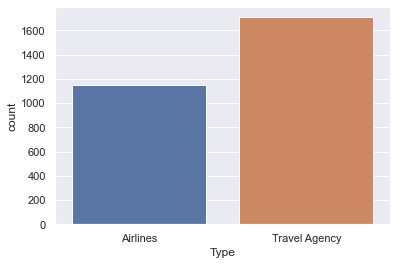

In [216]:
sns.countplot(x='Type', data=df_1)

#### Insights

* 59.73% customers prefer Travel Agency as their tour insurance firm.

* 40.27% customers prefer Airlines as their tour insurance firm.



In [217]:
df_1["Claimed"].value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

<AxesSubplot:xlabel='Claimed', ylabel='count'>

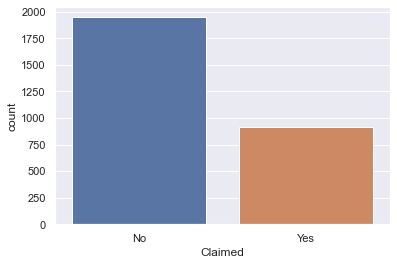

In [218]:
sns.countplot(x='Claimed', data=df_1)

#### Insights

* 68.05 % didn't Claim their insurance.

* 31.94 % Claim their insurance.

In [219]:
df_1["Channel"].value_counts(normalize =True)

Online     0.983922
Offline    0.016078
Name: Channel, dtype: float64

<AxesSubplot:xlabel='Channel', ylabel='count'>

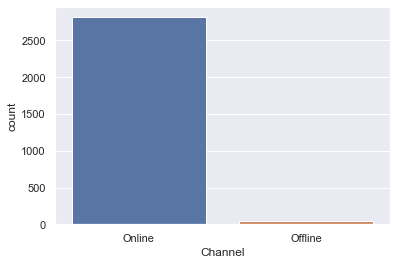

In [220]:
sns.countplot(x='Channel', data=df_1)

#### Insights

* 98.4% customers choose online channel.

* Only 1.60% customers choose offline channel.

In [221]:
df_1["Product Name"].value_counts(normalize =True)

Customised Plan      0.374345
Bronze Plan          0.225446
Cancellation Plan    0.214960
Silver Plan          0.147151
Gold Plan            0.038099
Name: Product Name, dtype: float64

<AxesSubplot:xlabel='Product Name', ylabel='count'>

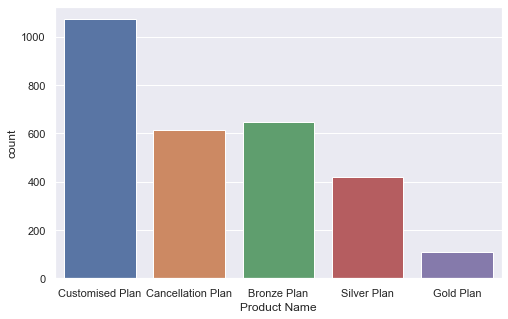

In [222]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product Name', data=df_1)

#### Insights

* 37.43% customers purchased Customised Plan.

* 22.54% customers purchased Bronze Plan.

* 21.49% customers purchased Cancellation Plan.

* 14.71% customers purchased Silver Plan.

* Only 3.8% customers purchased Gold Plan.



In [223]:
df_1["Destination"].value_counts(normalize =True)

ASIA        0.813352
Americas    0.111499
EUROPE      0.075149
Name: Destination, dtype: float64

<AxesSubplot:xlabel='Destination', ylabel='count'>

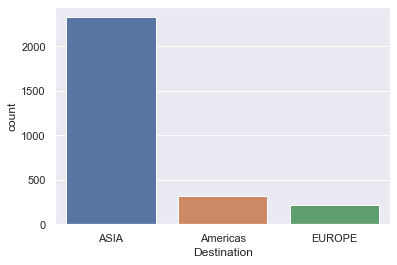

In [224]:
sns.countplot(x='Destination', data=df_1)

#### Insights

* 81.33% customers choosed Asia as Destination of the tour.

* 11.11% customers choosed Americas as Destination of the tour.

* Only 7.5% customers choosed Europe as Destination of the tour.



#### Bivariant Analysis 

#### *Scatter Plot

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

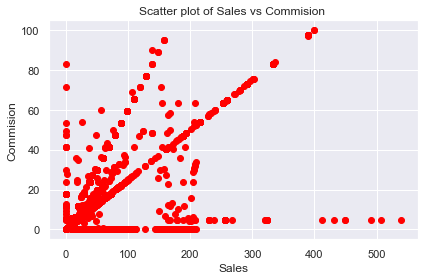

In [225]:
plt.scatter(df_1['Sales'],df_1['Commision'],color="RED")
plt.title("Scatter plot of Sales vs Commision ")
plt.xlabel("Sales")
plt.ylabel("Commision")
plt.tight_layout()
plt.show()

#### Insight

From the above plot we see that as the Sales increases the Commision is also increasing showing a positive relationship.

#### *Countplot with Hue.

* A countplot is kind of like a histogram or a bar graph for categorical variables.

* Hue :This parameter take column name for colour encoding

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

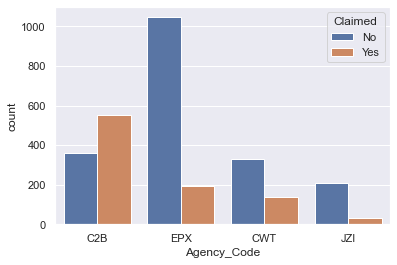

In [226]:
sns.countplot(x='Agency_Code', hue='Claimed', data=df_1)

#### Insights

* Customers with Agency Code C2B claimed more insurance.

* Most of Customers with Agency Code EPX didn't claimed insurance.

* Customers with Agency Code CWT & JZI  have no claimed  more than claimed.

<AxesSubplot:xlabel='Channel', ylabel='count'>

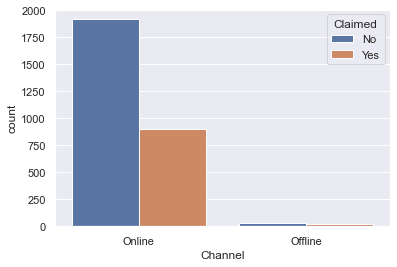

In [227]:
sns.countplot(x='Channel', hue='Claimed', data=df_1)

#### Insights

* In online channel no claimed status is more than claimed.

* In offline channel no claimed status is almost equivalent to claimed.

<AxesSubplot:xlabel='count', ylabel='Product Name'>

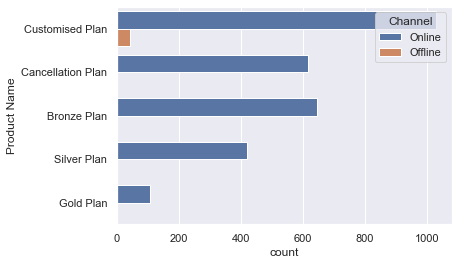

In [228]:
sns.countplot(y='Product Name', hue='Channel', data=df_1)

#### Insights

* Only Customized Plan is available in offline channel for customers. 

<AxesSubplot:xlabel='Product Name', ylabel='count'>

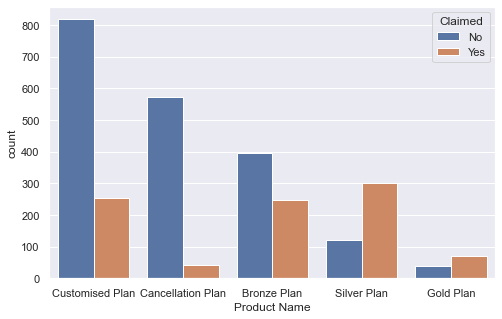

In [229]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product Name', hue='Claimed', data=df_1)


#### Insights

* Customers with Silver and Gold Plan claimed status is more than no claimed.

* Most of customers with Customized Plan and Cancellation Plan have no claimed status.

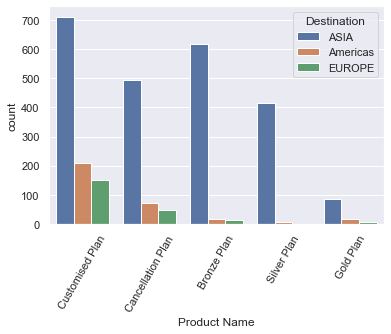

In [230]:
sns.countplot(x='Product Name', hue='Destination', data=df_1)
plt.xticks(rotation="60")
plt.show()

#### Insights

* Customers whose destination is asia  buys customised plan most.
* Customers whose destination is aisa  buys gold plan least.
* Customers whose destination is europe buys least insuarnce plans.


<AxesSubplot:xlabel='Claimed', ylabel='Age'>

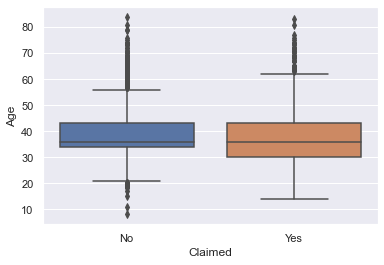

In [231]:
sns.boxplot(x='Claimed', y='Age',data=df_1)

#### Insights

* 50% customers who claimed the insurance are in the age level of 35-40. 




#### Multivariate Analysis

#### * Heatmap

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.Darker Shades have higher Corealtion , while lighter shades have smaller values of correaltion as compared to darker shades values.Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

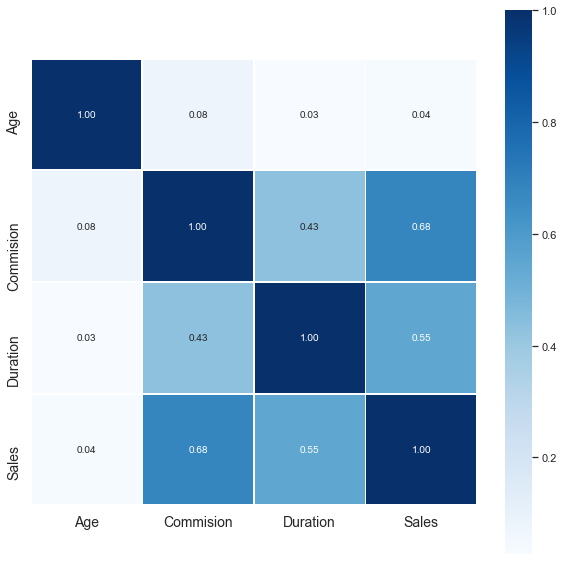

In [232]:
corr=df_1.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr,annot=True,cmap="Blues",linewidth=0.85,square=True,annot_kws={"size":10.10},fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(size=14)
plt.show()

#### Insights

From the above correlation table we conclude that,

* Commision with Sales show strong correlation i.e. 0.68.

* Duration with Sales also show strong correlation i.e. 0.55.

* Duration with Age and Age with Sales show least +ve correlation among all.

#### *Pairplot

Pairplot shows the relationship between the variables in the form of scatterplot and the distribution of the variable in the form of histogram.

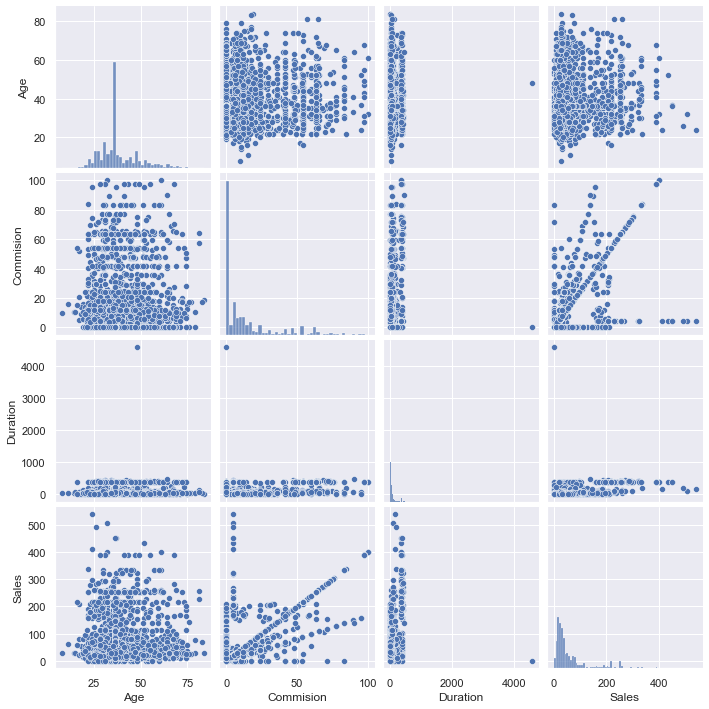

In [233]:
sns.pairplot(df_1)
plt.show()

#### Insights

* Sales with Commision show positive relationship , Sales increases the Commision is also increasing.

#### Checking for Outliers in the dataset.

To check for outliers, we will be plotting the box plots.

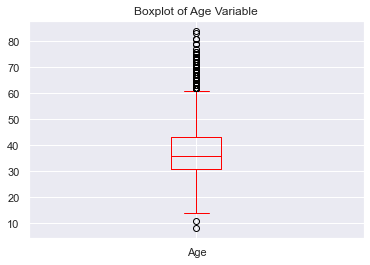

In [234]:
df_1.boxplot(column=['Age'],color="red")
plt.title("Boxplot of Age Variable")
plt.show()

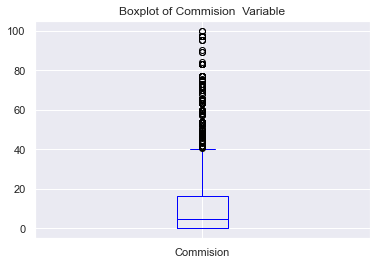

In [235]:
df_1.boxplot(column=['Commision'],color="blue")
plt.title("Boxplot of Commision  Variable")
plt.show()

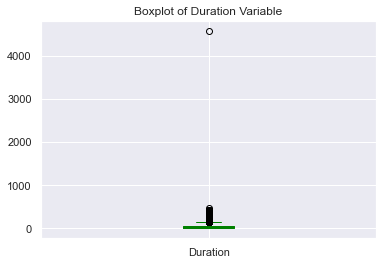

In [236]:
df_1.boxplot(column=['Duration'],color="green")
plt.title("Boxplot of Duration Variable")
plt.show()

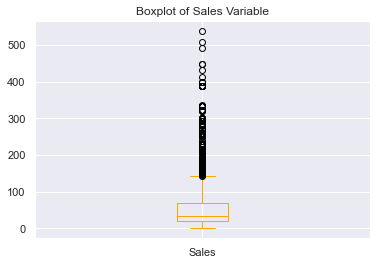

In [237]:
df_1.boxplot(column=['Sales'],color="orange")
plt.title("Boxplot of Sales Variable")
plt.show()

* Observations:

* Looking at the box plot, it seems that the four variables Age, Commision , Duration and  Sales have outlier present in the variables.

* As per the instructions - Prefer not to treat outliers here. An observation is considered to be an outlier if that particular has been mistakenly captured in the data set. Treating outliers sometimes results in the models having better performance but the models lose out on the generalization. So, a good way to approach this would be to build models with and without treating outliers and then report the results. So we are only check the outliers but not treat them as per context of the problem given.




#### ENCODING


In [238]:
df_1.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [239]:
for feature in df_1.columns: 
    if df_1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_1[feature].unique()))
        print(pd.Categorical(df_1[feature].unique()).codes)
        df_1[feature] = pd.Categorical(df_1[feature]).codes




feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


#### Checking the unique counts

In [240]:
print('Agency_Code \n',df_1.Agency_Code.value_counts())
print('\n')
print('Type \n',df_1.Type.value_counts())
print('\n')
print('Claimed \n',df_1.Claimed.value_counts())
print('\n')
print('Channel \n',df_1.Channel.value_counts())
print('\n')
print('Product Name \n',df_1["Product Name"].value_counts())
print('\n')
print('Destination \n',df_1.Destination.value_counts())

Agency_Code 
 2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1709
0    1152
Name: Type, dtype: int64


Claimed 
 0    1947
1     914
Name: Claimed, dtype: int64


Channel 
 1    2815
0      46
Name: Channel, dtype: int64


Product Name 
 2    1071
0     645
1     615
4     421
3     109
Name: Product Name, dtype: int64


Destination 
 0    2327
1     319
2     215
Name: Destination, dtype: int64


#### Checking Original Dataset after Encoding

In [241]:
df_1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0,0.00,1,34.0,20.00,2,0
2,39,1,1,0,5.94,1,3.0,9.90,2,1
3,36,2,1,0,0.00,1,4.0,26.00,1,0
4,33,3,0,0,6.30,1,53.0,18.00,0,0


In [242]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 193.1 KB


In [243]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.0,43.00,84.0
Agency_Code,2861.0,1.280671,1.003773,0.0,0.0,2.0,2.00,3.0
Type,2861.0,0.597344,0.490518,0.0,0.0,1.0,1.00,1.0
Claimed,2861.0,0.319469,0.466352,0.0,0.0,0.0,1.00,1.0
Commision,2861.0,12.992723,19.775132,0.0,0.0,5.0,16.25,99.9
Channel,2861.0,0.983922,0.125799,0.0,1.0,1.0,1.00,1.0
Duration,2861.0,72.129850,135.973001,0.0,12.0,28.0,66.00,4580.0
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.5,69.30,539.0
Product Name,2861.0,1.666550,1.277822,0.0,1.0,2.0,2.00,4.0
Destination,2861.0,0.261797,0.586239,0.0,0.0,0.0,0.00,2.0


#### Result

* Label Encoding has been done and all columns are converted to number.

* After performing EDA , various data preprocessing & data preparation steps our dataset is now ready for supervised modelling algorithms like Decision Tree , RandomForest & ANN.

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.

#### Proportion of 1s and 0s.

In [244]:
df_1.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes.

####  Extracting the target column into separate vectors for training set and test set.

In [245]:
X = df_1.drop("Claimed", axis=1)

y = df_1.pop("Claimed")

Separating the independent and target columns.

####  Splitting data into training and test set.¶

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

#### Checking the dimensions of the training and test data.

In [249]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


#### Building a Decision Tree Classifier

#### Grid Search for finding out the optimal values for the hyper parameters

In [250]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,12,14,15],   
    'min_samples_leaf': [50,100,150],   
    'min_samples_split': [150,300,350],   
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10, scoring='recall')



In [251]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

####  Generating Tree

In [252]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data


http://webgraphviz.com/

####  Variable Importance

In [253]:
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.600450
Sales         0.304966
Product Name  0.047357
Duration      0.018764
Commision     0.014732
Age           0.013731
Type          0.000000
Channel       0.000000
Destination   0.000000


#### Building a Random Forest Classifier

#### Grid Search for finding out the optimal values for the hyper parameters.

In [315]:
param_grid = {
    'max_depth': [10,12,14,15],
    'max_features': [6,7,8,9],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450], 
    'n_estimators': [100,200] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [316]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 12, 14, 15],
                         'max_features': [6, 7, 8, 9],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450],
                         'n_estimators': [100, 200]})

In [317]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 100}

In [318]:
best_grid = grid_search.best_estimator_

In [319]:
best_grid

RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=50,
                       min_samples_split=150, random_state=1)

In [320]:
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.511924
Sales         0.247836
Product Name  0.153181
Duration      0.038917
Commision     0.023702
Age           0.022406
Destination   0.002012
Type          0.000021
Channel       0.000000


#### Building a Artificial Neural Network Classifier

In [352]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_3 = std_scale.fit_transform(X_train)
X_test_3 = std_scale.transform(X_test)

#### Grid Search for finding out the optimal values for the hyper parameters.

In [353]:
param_grid = {
    'hidden_layer_sizes': [50,100], 
    'max_iter': [2500,], 
    'solver': ['adam','sgd'], 
    'tol': [0.1,0.01], 
}

anncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = anncl, param_grid = param_grid, cv = 10)

In [354]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_


{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [355]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

#### CART MODEL 

#### Predicting on Training and Test dataset


In [273]:
cart_ytrain_predict = best_grid.predict(X_train)
cart_ytest_predict = best_grid.predict(X_test)

In [274]:
cart_ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [275]:
cart_ytest_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

#### Getting the Predicted Probability

In [276]:
cart_ytrain_predict_prob=best_grid.predict_proba(X_train)
cart_ytrain_predict_prob
pd.DataFrame(cart_ytrain_predict_prob).head()

,0,1
0,0.847222,0.152778
1,0.672414,0.327586
2,0.837500,0.162500
3,0.462838,0.537162
4,0.870588,0.129412


In [277]:
cart_ytest_predict_prob=best_grid.predict_proba(X_test)
cart_ytest_predict_prob
pd.DataFrame(cart_ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.837500,0.162500
4,0.837500,0.162500


#### Model Evaluation

AUC: 0.810


Text(0, 0.5, 'True Positive Rate')

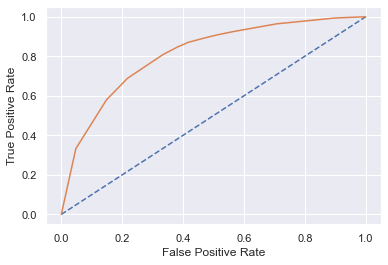

In [278]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Confusion Matrix for the training data

In [279]:
cart_confusion_matrix_train=confusion_matrix(train_labels, cart_ytrain_predict)

In [280]:
cart_confusion_matrix_train

array([[1157,  202],
       [ 270,  373]])

In [281]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels)
cart_train_acc

0.7642357642357642

#### Classification Report

In [282]:
print(classification_report(train_labels, cart_ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [283]:
cart_metrics=classification_report(train_labels, cart_ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.58
cart_train_f1  0.61


#### AUC and ROC for the test data

AUC: 0.792


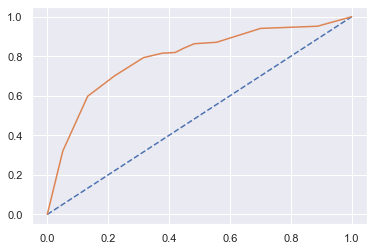

In [284]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

#### Confusion Matrix for test data

In [285]:
cart_confusion_matrix_test=confusion_matrix(test_labels, cart_ytest_predict)
cart_confusion_matrix_test

array([[510,  78],
       [109, 162]])

In [286]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

#### Classifiaction Report

In [287]:
print(classification_report(test_labels, cart_ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [289]:
cart_metrics=classification_report(test_labels, cart_ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.68
cart_test_recall  0.6
cart_test_f1  0.63


#### Variable Importance

In [290]:
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.600450
Sales         0.304966
Product Name  0.047357
Duration      0.018764
Commision     0.014732
Age           0.013731
Type          0.000000
Channel       0.000000
Destination   0.000000


#### CART Conclusion:

Train Data:

* AUC:  81.0%

* Accuracy: 76%

* Precision: 65%

* Recall:58%    

* f1-Score: 61%

Test Data:

* AUC:  79.2%

* Accuracy: 78%

* Precision: 68%

* Recall:60%    

* f1-Score: 63%

* Training and Test set results are almost similar, and with the overall measures, the model is a good model.

* Agency_Code is the most important variable for predicting claim status.

#### Random Forest Classifier Model

#### Predicting the Training and Testing data

In [337]:
rf_ytrain_predict = best_grid.predict(X_train)
rf_ytest_predict = best_grid.predict(X_test)

In [338]:
rf_ytrain_predict
rf_ytrain_predict_prob=best_grid.predict_proba(X_train)
rf_ytrain_predict_prob
pd.DataFrame(rf_ytrain_predict_prob).head()

,0,1
0,0.734154,0.265846
1,0.755767,0.244233
2,0.778022,0.221978
3,0.448887,0.551113
4,0.880853,0.119147


In [340]:
rf_ytest_predict
rf_ytest_predict_prob=best_grid.predict_proba(X_test)
rf_ytest_predict_prob
pd.DataFrame(rf_ytest_predict_prob).head()

,0,1
0,0.554259,0.445741
1,0.922222,0.077778
2,0.289767,0.710233
3,0.750097,0.249903
4,0.695166,0.304834


#### RF Model Performance Evaluation on Training data¶

In [341]:
confusion_matrix(train_labels,rf_ytrain_predict)

array([[1200,  159],
       [ 292,  351]])

In [342]:
#Train Data Accuracy
rf_train_acc=best_grid.score(X_train,train_labels)
rf_train_acc

0.7747252747252747

#### Classification Report

In [343]:
print(classification_report(train_labels,rf_ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1359
           1       0.69      0.55      0.61       643

    accuracy                           0.77      2002
   macro avg       0.75      0.71      0.73      2002
weighted avg       0.77      0.77      0.77      2002



In [344]:
rf_metrics=classification_report(train_labels, rf_ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.69
rf_train_recall  0.55
rf_train_f1  0.61


#### AUC and ROC for the train data

Area under Curve is 0.819904055332974


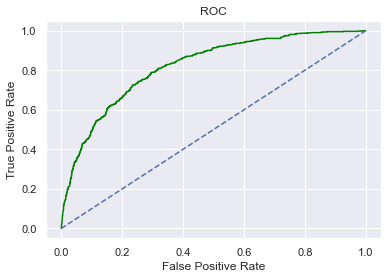

In [345]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

#### RF Model Performance Evaluation on Test data

In [346]:
confusion_matrix(test_labels,rf_ytest_predict)

array([[520,  68],
       [125, 146]])

In [347]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7753201396973225

#### Classification Report

In [348]:
print(classification_report(test_labels,rf_ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       588
           1       0.68      0.54      0.60       271

    accuracy                           0.78       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



In [349]:
rf_metrics=classification_report(test_labels, rf_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.54
rf_test_f1  0.6


#### AUC and ROC for the test data

Area under Curve is 0.812630218138916


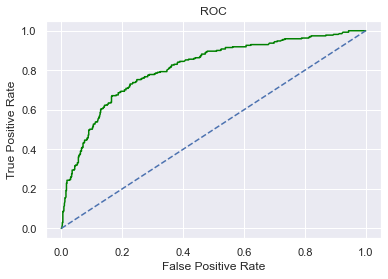

In [350]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

#### Variable Importance

In [351]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.511924
Sales         0.247836
Product Name  0.153181
Duration      0.038917
Commision     0.023702
Age           0.022406
Destination   0.002012
Type          0.000021
Channel       0.000000


#### Random Forest Conclusion


Train Data:

* AUC: 82%

* Accuracy: 77%

* Precision: 69%

* Recall:55%    

* f1-Score: 61%

Test Data:
* AUC:  81%

* Accuracy: 78%

* Precision: 68%

* Recall:54%    

* f1-Score: 60%

* Training and Test set results are almost similar, and with the overall measures, the model is a good model.

* Agency_Code is the most important variable for predicting claim status.

#### Artificial Neural Network Model

#### Predicting the Training and Testing data

In [371]:
ann_ytrain_predict = best_grid.predict(X_train)
ann_ytest_predict = best_grid.predict(X_test)

In [372]:
ann_ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [373]:
ann_ytest_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [374]:
ann_ytrain_predict
ann_ytrain_predict_prob=best_grid.predict_proba(X_train)
ann_ytrain_predict_prob
pd.DataFrame(ann_ytrain_predict_prob).head()

,0,1
0,0.820807,0.179193
1,0.725507,0.274493
2,0.527579,0.472421
3,0.250810,0.749190
4,0.508285,0.491715


In [375]:
ann_ytest_predict
ann_ytest_predict_prob=best_grid.predict_proba(X_test)
ann_ytest_predict_prob
pd.DataFrame(ann_ytest_predict_prob).head()

,0,1
0,0.029578,0.970422
1,0.889201,0.110799
2,0.251386,0.748614
3,0.728909,0.271091
4,0.653790,0.346210


#### ANN Model Performance Evaluation on Training data

In [376]:
confusion_matrix(train_labels,ann_ytrain_predict)

array([[1099,  260],
       [ 234,  409]])

In [377]:
#Accuracy of train data
ann_train_acc=best_grid.score(X_train,train_labels)
ann_train_acc

0.7532467532467533

#### Classification Report

In [378]:
print(classification_report(train_labels,ann_ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1359
           1       0.61      0.64      0.62       643

    accuracy                           0.75      2002
   macro avg       0.72      0.72      0.72      2002
weighted avg       0.76      0.75      0.75      2002



In [379]:
ann_metrics=classification_report(train_labels, ann_ytrain_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_precision  0.61
ann_train_recall  0.64
ann_train_f1  0.62


#### AUC and ROC for the train data

Area under Curve is 0.7914639686806578


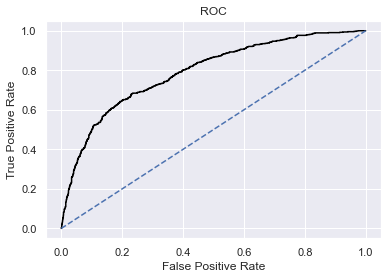

In [380]:
ann_train_fpr, ann_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(ann_train_fpr,ann_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ann_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', ann_train_auc)

#### ANN Model Performance Evaluation on Test data

In [381]:
confusion_matrix(test_labels,ann_ytest_predict)

array([[475, 113],
       [109, 162]])

In [382]:
#Accuracy of test data
ann_test_acc=best_grid.score(X_test,test_labels)
ann_test_acc

0.7415599534342259

#### Classification Report

In [383]:
print(classification_report(test_labels,ann_ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       588
           1       0.59      0.60      0.59       271

    accuracy                           0.74       859
   macro avg       0.70      0.70      0.70       859
weighted avg       0.74      0.74      0.74       859



In [384]:
ann_metrics=classification_report(test_labels, ann_ytest_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',ann_test_precision)
print ('nn_test_recall ',ann_test_recall)
print ('nn_test_f1 ',ann_test_f1)

nn_test_precision  0.59
nn_test_recall  0.6
nn_test_f1  0.59


#### AUC and ROC for the test data

Area under Curve is 0.7925734869593593


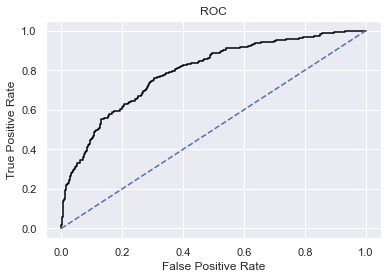

In [385]:
ann_test_fpr, ann_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(ann_test_fpr,ann_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ann_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', ann_test_auc)

#### Artificial Neural Network Model Conclusion

Train Data:

* AUC: 79.14%

* Accuracy: 75%

* Precision: 61%

* Recall:64%    

* f1-Score: 62%

Test Data:

* AUC: 79.25%

* Accuracy: 74%

* Precision: 59%

* Recall:60%    

* f1-Score: 59%

* Training and Test set results are almost similar, and with the overall measures, the model is a good model.

### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

#### Comparison of the performance metrics from the 3 models

In [386]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.77,0.78,0.75,0.74
AUC,0.81,0.79,0.82,0.81,0.79,0.79
Recall,0.58,0.60,0.55,0.54,0.64,0.60
Precision,0.65,0.68,0.69,0.68,0.61,0.59
F1 Score,0.61,0.63,0.61,0.60,0.62,0.59


#### ROC Curve for the 3 models on the Training data

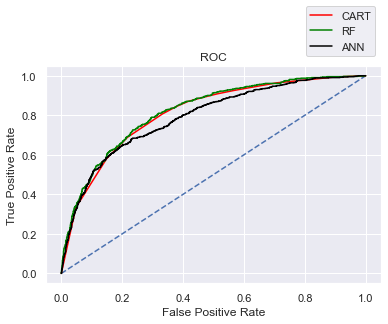

In [387]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### ROC Curve for the 3 models on the Test data

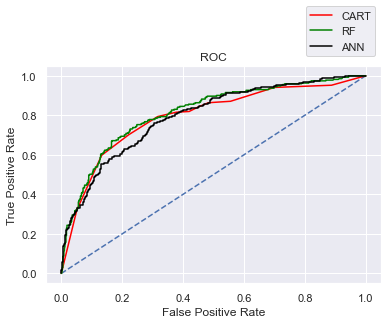

In [388]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### Conclusion:

* Out of the 3 models, Random Forest has slightly better performance than the Cart and Artificial Neural network model

* Overall all the 3 models are reasonaly stable enough to be used for making any future predictions. From Cart and Random Forest Model, the variable Agency_Code is found to be the most useful feature amongst all other features for predicting if a customer has claim insurance or not.

### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations



#### Insights


* Agency_Code is found to be the most useful feature amongst all otherfeatures for predicting if a customer has claim insurance or not.

* 43.27% customers have Agency_Code 'EPX' which is the max amongall 4 Agency_Code present in the data.

* Only 8.3% customers have Agency_Code 'JZI' which is the min amongall 4 Agency_Code present in the data.

* 59.73% customers prefer Travel Agency as their tour insurance firm.

* 40.27% customers prefer Airlines as their tour insurance firm.

* 98.4% customers choose online channel for doing their insurance.i.e.online medium has made most of the sale.

* Only 1.60% customers choose offline channel for doing their insurance.

* 81.33% customers choosed Asia as Destination of the tour.

* we see that as the Sales increases the Commision is also increasingshowing a positive relationship.

#### Recommendations

* Need to train the JZI agency resources to pick up sales as they are inbottom, need to run promotional marketing campaign or evaluate ifwe need to tie up with alternate agency in order to attract morecustomers.

* Also based on the model we are getting 75-78% accuracy, so weneed customer books airline tickets or plans, cross sell the insurancebased on the claim data pattern.

* Other interesting fact is more sales happen via Agency than Airlinesand the trend shows the claim are processed more at Airline. So wemay need to deep dive into the process to understand the workflowand why?

* Key performance indicators (KPI) The KPI’s of insurance claims are:

* Increase customer satisfaction which in fact will give more revenue.

* Combat fraud transactions, deploy measures to avoid fraudulenttransactions at earliest.

* Optimize claims recovery method.

* Reduce claim handling costs.

##### ---------------------------------------------------The End --------------------------------------------------------------                                              

In [ ]:
def up_down (i)
